<a href="https://colab.research.google.com/github/hessrafael/mvp_rafael_hess_fetal_health_class/blob/main/MVP_Rafael_Hess_Sa%C3%BAde_Fetal_P%C3%B3s_PUCRio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saúde Fetal - MVP Rafael Hess Almaleh, Pós Ciência de Dados PUCRio, Abril 2024

Neste MVP, vamos trabalhar com o dataset "Saúde Fetal" (presente em https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)

Este trabalho foi construído no âmbito da Pós-Graduação em Ciências de Dados da PUCRio.

# Definição do Problema

O objetivo deste projeto é conseguir classificar a saúde de um feto em "Saudável", "Suspeito" ou "Patológico" a partir de dados de Cardiotocografias (CTG).

Segundo dados da ALESP, em uma cardiotocografia "[...] São registrados então, durante cerca de 20 a 30 minutos, de modo contínuo, a frequência cardíaca e movimentos do bebê, bem como a presença e duração de contrações do útero. Ao final do exame, o aparelho gera um laudo em forma de gráfico, semelhante ao de um eletrocardiograma, que deve ser interpretado pelo especialista.[...]"

E é esse especialista que classificará os resultados como um feto saudável, suspeito ou patológico. Neste exame, o obstetra começa a avaliar os batimentos do feto em repouso e depois começa a realizar uma série de estímulos para acordá-lo e ver se ele responde (apresentando uma certa variabilidade em seus batimentos). Deste modo, temos um gráfico que apresenta oscilações em torno de um valor basal (linha de base). Essas oscilações (ou a ausência delas) podem ser saudáveis ou patológicas, a depender da interpretação do especialista.

Abaixo, temos uma imagem exemplo do que é um resultado do exame CTG.

![ctg_img](https://drive.google.com/uc?export=view&id=1aTMi-X8nkwo5Ell-KgjZfLbuOp-AdFkB)

É a partir desse gráfico que os atributos do dataset são criados.

Na sequência, iremos importar os dados e iremos descrever cada um dos seus atributos.

## Configuração e Importação de Dados

Primeiro realizamos os imports e importamos os dados nas células a seguir. Após, vamos explicar o que é cada atributo importado



In [1]:
# Vamos começar importando as bibliotecas necessárias para a execução do notebook
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
import joblib
import urllib.request
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc, roc_curve

seed = 7 #definindo a seed para repetibilidade
np.random.seed(7)

In [2]:
# Carregando o conjunto de dados

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/hessrafael/mvp_rafael_hess_fetal_health_class/main/fetal_health.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
# Mostra alguns dados sobre o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## Discussão sobre os atributos
Com as células acima, vemos que o conjunto apresenta 21 atributos e o nosso objetivo (target) que é a saúde fetal (fetal_health).

Podemos ver que temos 2126 linhas em todos os atributos, indicando que não há dados faltantes ou nulos. Por meio do método describe, conseguimos ver que cada atributo apresenta uma escala e distribuição diferente, indicando que uma etapa de scaling dos dados possa ser necessária para chegar a modelos com qualidade.

Mas afinal, o que é cada atributo? Vamos lista-los e explica-los a seguir:


Atributo | Descrição
---------|------------
baseline value                                          | Valor de linha de base dos batimentos fetais
accelerations                                           | Acelerações
fetal_movement                                          | Movimentos fetais
uterine_contractions                                    | Contrações uterinas
light_decelerations                                     | Desacelerações leves
severe_decelerations                                    | Desacelerações severas
prolongued_decelerations                                | Desacelerações prolongadas
abnormal_short_term_variability                         | Variabilidade anormal de curto prazo
mean_value_of_short_term_variability                    | Valor médio da variabilidade de curto prazo
percentage_of_time_with_abnormal_long_term_variability  | Porcentagem do tempo com variabilidade anormal de longo prazo
mean_value_of_long_term_variability                     | Valor médio da variabilidade de longo prazo
histogram_width                                         | Largura do histograma
histogram_min                                           | Valor mínimo dos batimentos do histograma
histogram_max                                           | Valor máximo dos batimentos no histograma
histogram_number_of_peaks                               | Número de picos do histograma
histogram_number_of_zeroes                              | Numero de zeros no histograma
histogram_mode                                          | A moda dos dados do histograma
histogram_mean                                          | A média dos dados encontrados no histograma
histogram_median                                        | A mediana dos dados encontrados no histograma
histogram_variance                                      | A variância dos dados do histograma
histogram_tendency                                      | A tendência dos dados do histograma
fetal_health                                            | O nosso target, a saúde fetal, sendo 1, 2 ou 3 respectivamente saudável, suspeito ou patológica

Na sequência, vamos ver como está a distribuição entre as classes no nosso target
                                      


## Análise dos Dados

Aqui vamos explorar um pouco como é a distribuição das 3 classes, além de ver como cada atributo está relacionado entre si

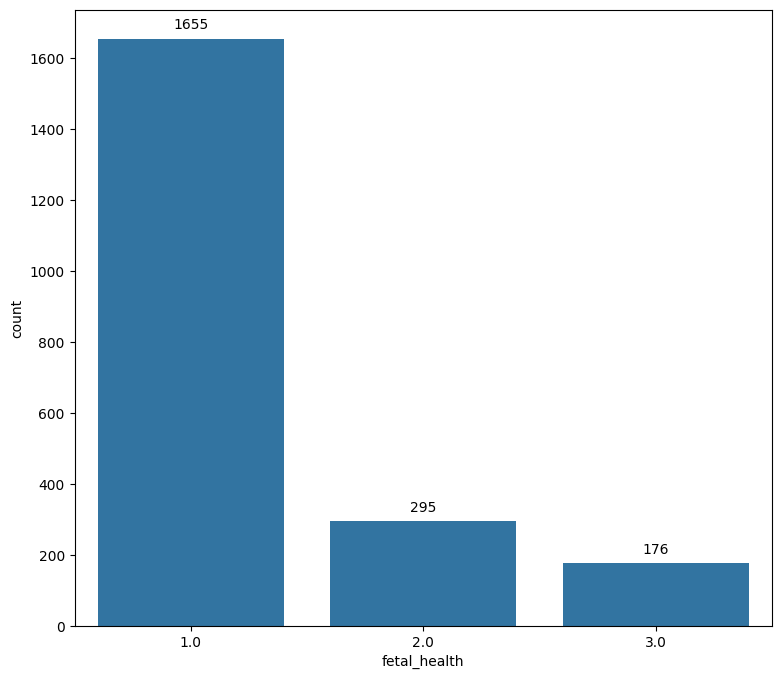

In [5]:
# Plotando a distribuição da saúde fetal
plt.figure(figsize=(9, 8))
ax = sns.countplot(data=dataset, x='fetal_health')

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

Na imagem abaixo, vemos que o problema é bem desbalanceado, com a maioria dos casos sendo "saudáveis" e uma minoria dividida entre "suspeito" e "patológico".

Isto já era um resultado esperado, dado que espera-se que a maioria dos fetos que cheguem em uma maternidade normal estejam saudáveis.

O desbalanceamento traz implicações na escolha dos modelos e da métrica utilizada para o nosso classificador.

![desbal](https://drive.google.com/uc?export=view&id=1F-51gdsHMhBGPpDYAh5UgPoT2LGOzqF9)

Por exemplo, a escolha da acurácia não seria uma opção adequada, dado que um modelo que sempre apontasse "Saudável" já teria uma acurácia de 1655/2126 = 78% e por isso precisamos pensar em outra métrica (que será detalhada mais a frente).

Antes disso, vamos ver como é a correlação entre os atributos? A análise de correlação pode nos revelar atributos que são altamente correlacionados entre si. Manter atributos altamente correlacionados entre si torna o modelo mais complexo, redundante e não permite que realizemos uma análise de impacto da variação da saída em função da variação de cada atributo. É então uma boa prática buscar remover atributos altamente correlacionados entre si.

<Axes: >

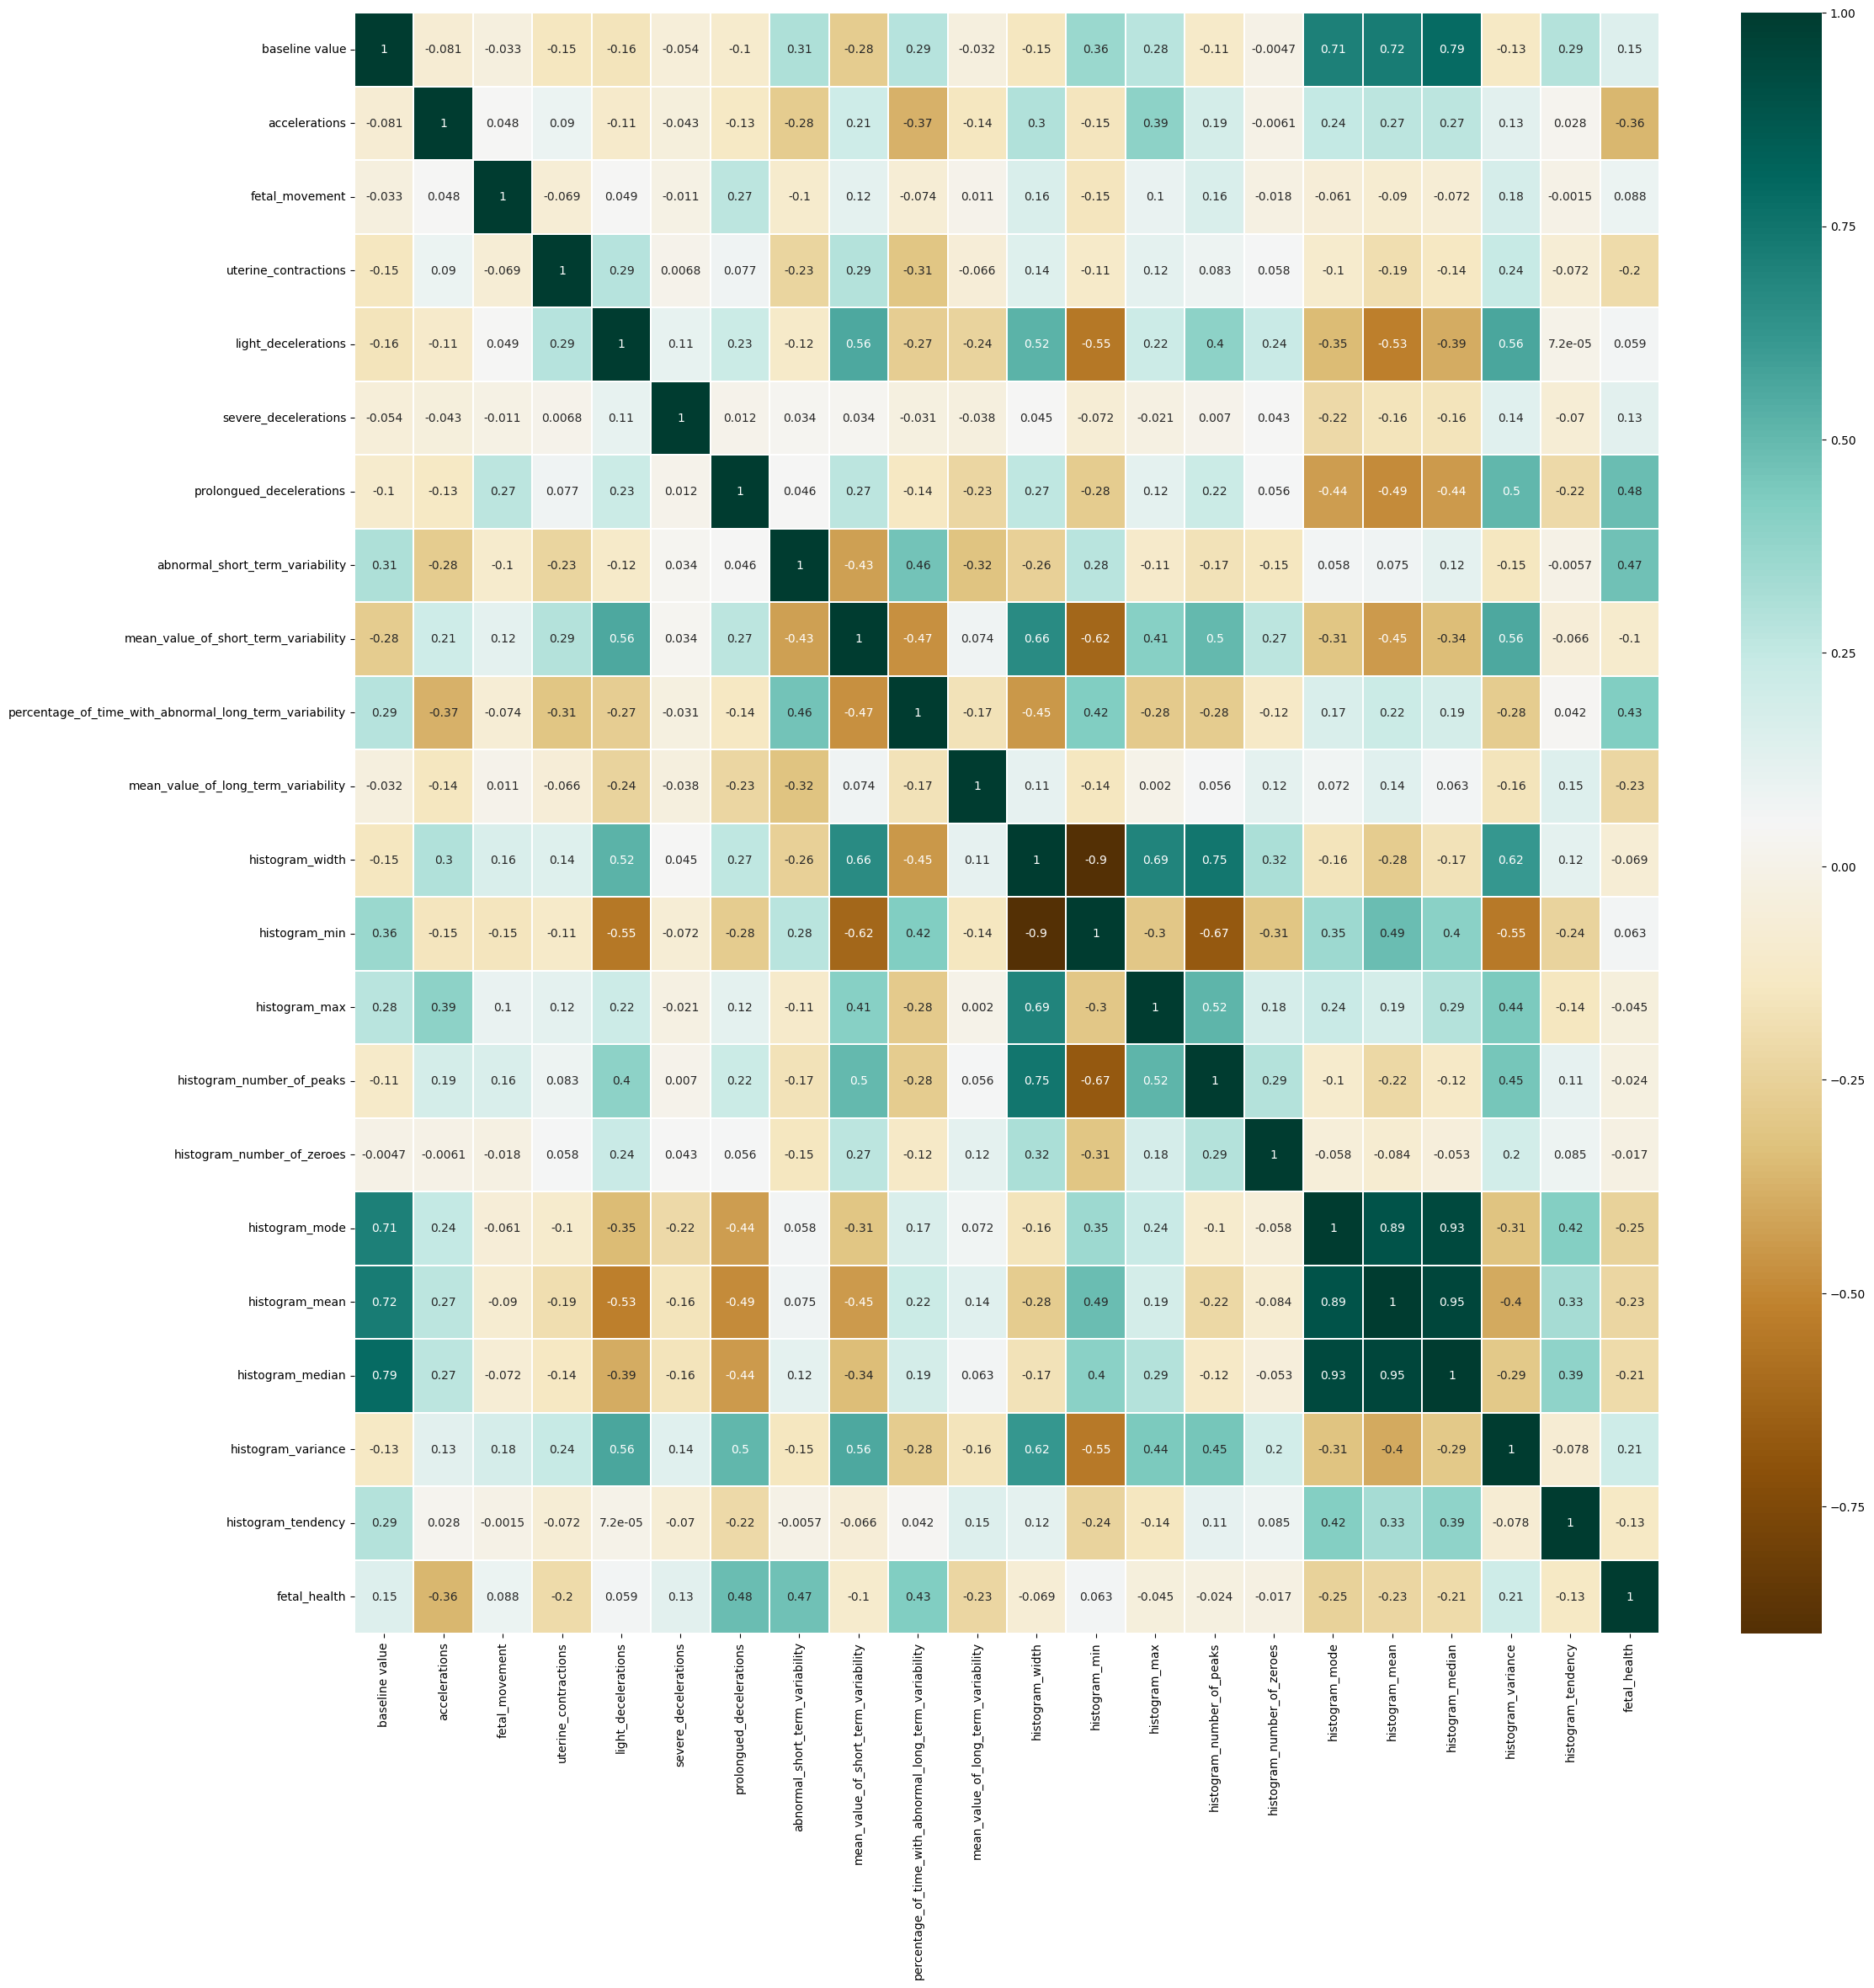

In [6]:
# Vamos ver como é a correlação entre as features (para nos indicar quais podem ser as features a serem removidas)
correlacao = dataset.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(data = correlacao,cmap='BrBG', annot=True, linewidths=0.2)

Vemos que existem atributos altamente correlacionados entre si e que podem ser removidos. Por exemplo, a média a moda e a mediana são altamente correlacionadas entre si, pois as 3 são medidas de tendência centrais e de certo modo "dizem a mesma coisa" sobre os dados. Além disso, as 3 são altamente correlacionadas com o baseline_value, que é nada mais do que a "linha de base" dos batimentos, ou seja, também um valor central dos dados. Logo, há indícios de atributos redundantes dentro do datset.

![corr_antes](https://drive.google.com/uc?export=view&id=1HMKpuUZaW81GS9M90JZQyJKZoaRFitMq)


Para remover essas redundâncias e simplificar o modelo, vamos remover os atributos que apresentam uma correlação absoluta maior ou igual a 70%

['histogram_min', 'histogram_number_of_peaks', 'histogram_mode', 'histogram_mean', 'histogram_median']


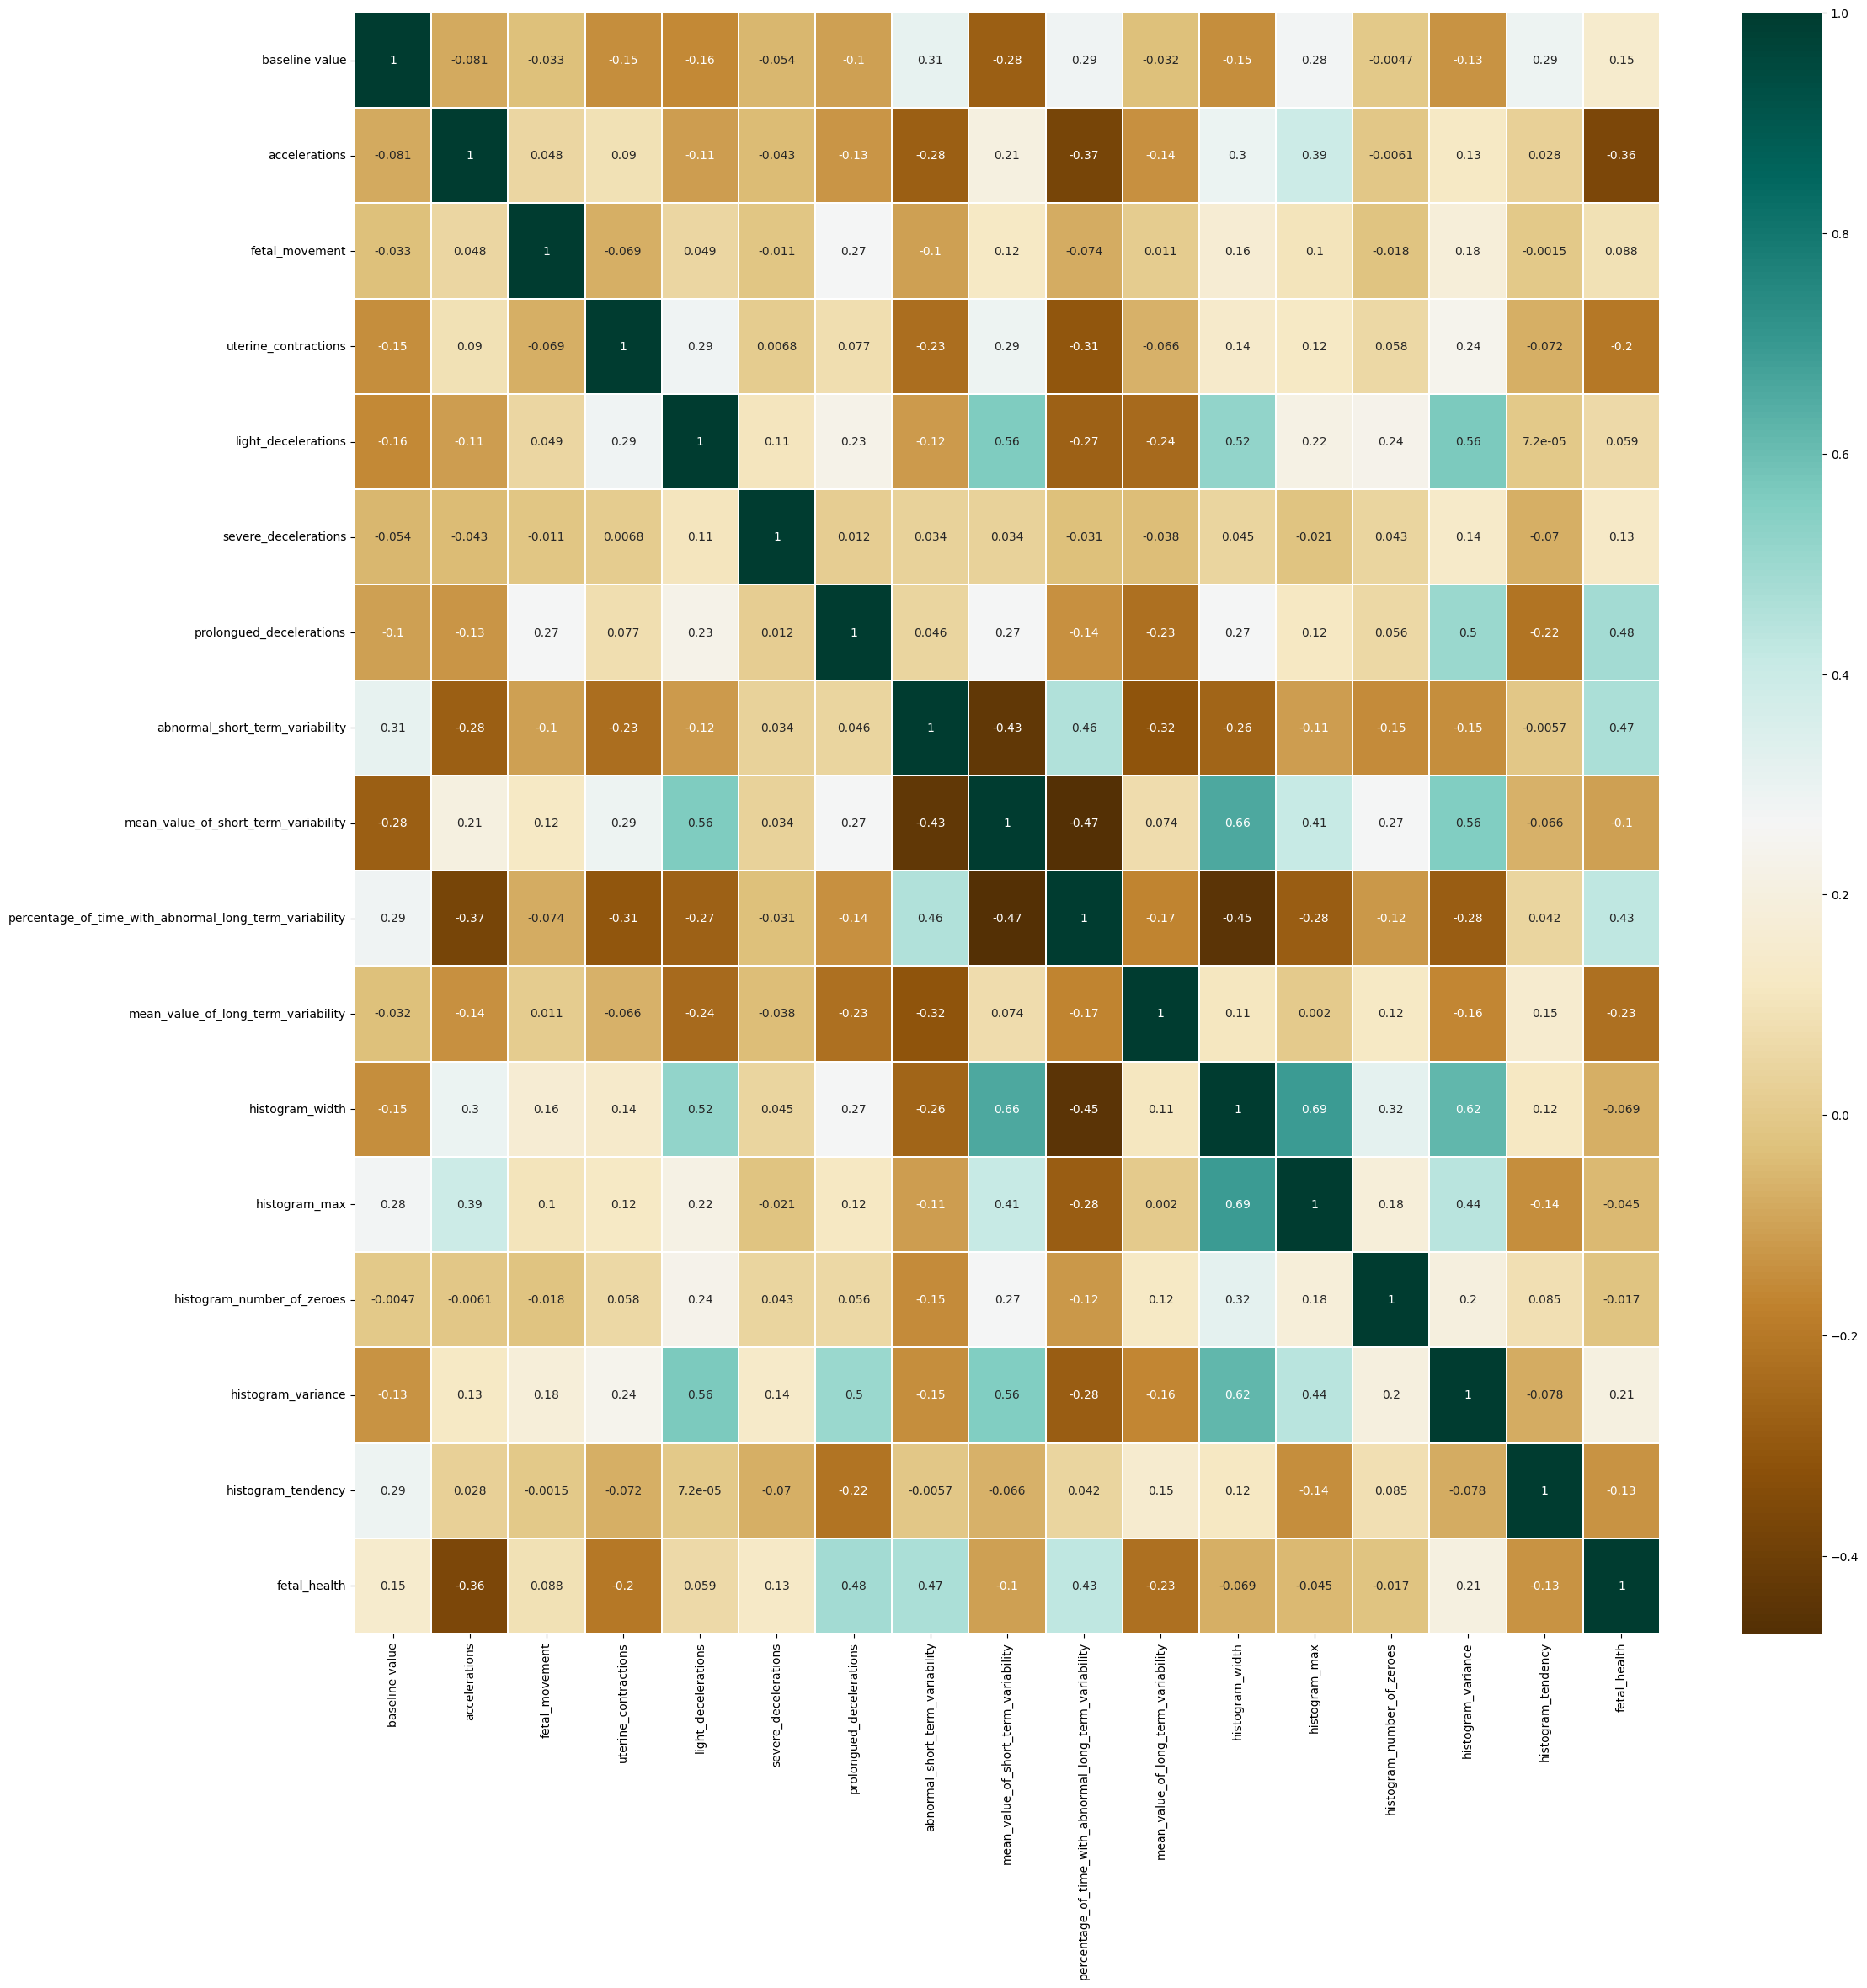

In [7]:
# Vamos remover os atributos altamente correlacionados entre si. Consideramos como limiar 70% de correlação absoluta

corr_abs = correlacao.abs()

# Selecionamos apenas a parte de cima da matriz de correlação
corr_sup = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))

# Procuramos os atributos com correlação maior ou igual a 0.7
atributos_a_remover = [column for column in corr_sup.columns if any(corr_sup[column] >= 0.7)]


# Removemos os atribuitos filtrados e visualizamos a nova matriz de correlação
dataset.drop(atributos_a_remover,axis=1, inplace=True)

correlacao = dataset.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(data = correlacao, cmap='BrBG',annot=True, linewidths=0.2)


print(atributos_a_remover)

Vemos que conseguimos remover 5 atributos altamente correlacionados entre si, com a nova matriz de correlação não apresentando nenhum atributo com correlação maior de 70% entre si.

![corr_depois](https://drive.google.com/uc?export=view&id=1ma9NaHnn9_vnFD3UgyorEhfGjo21-dkz)



Os atributos removidos foram 'histogram_min', 'histogram_number_of_peaks', 'histogram_mode', 'histogram_mean', 'histogram_median'

A moda, a média e a mediana já explicamos que são medidas de tendência central e são redundantes se considerarmos a linha de base do histograma na nossa análise (baseline_value).

O número de picos do histograma é altamente correlacionado com a largura do histograma (histogram_width). Isso faz sentido pois quanto mais largo o histograma (i.e mais tempo rodando o exame) mais picos teremos nos batimentos.

Já o valor mínimo do histograma é altamente correlacionado de maneira negativa em relação a largura do histograma, ou seja, quanto mais curto o histograma, maior o valor mínimo e quanto mais longo o histograma, menor o valor mínimo. Isso pode ser explicado pelo fato de o exame normalmente terminar quando não há mais perturbações no feto, ou seja, com os batimentos se acalmando ou então quanto mais longo o exame, maior a ocorrência de desacelerações nos batimentos, o que significa batimentos menores no exame.

Ficamos então com 16 atributos no nosso problema.

# Preparação dos Dados

Definido o nosso problema e realizada a análise inicial do nosso conjunto de dados, removemos os atributos redundantes, verificamos que não há registros faltantes, vimos que o dataset é desbalanceado e que as variáveis apresentam escalas diferentes. Dito isto, agora é a vez de preparamos (preprocessarmos) os dados.

Começamos separando o conjunto teste e treinamento. Esta é a primeira etapa para evitar vazamento de dados entre o conjunto teste e treinamento. Separamos 20% dos dados para o teste.

Ao fazer o split, devemos respeitar a proporção das classes, por isso utilizamos o atributo target no campo stratify.

In [8]:
# Vamos separar em conjunto teste e treinamento
test_size = 0.2

array = dataset.values
X = array[:,0:-1]
y = array[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) #stratify é importante para respeitar o desbalanceamento



Aqui vamos escolher a métrica utilizada para a otimização do nosso problema. Como falamos anteriormente, a accuracy não é uma boa métrica para esse conjunto de dados desbalanceado.

Escolhemos a métrica F1-score, que equilibra a precisão e o recall, como a métrica utilizada para a avaliação. A escolha deu-se pelo equilíbrio, pois como as 3 classes são importantes, queremos que o sistema seja muito preciso (precisão), mas que também tenha uma alta cobertura dos dados (recall). O F1-score nos proporciona, em um único número, representar esse equilíbrio.

Ele é definido pela seguinte equação:

$F1Score = \frac{2 * precisão * recall}{precisão+recall}$

Escolhemos a função F1 do tipo weighted para respeitar o desbalanceamento dos dados.

Para completar a definição da validação, vamos seguir uma estratégia de validação estratificada dividida em 10 batches de treino e validação. Para isso, utilizamos a função StratifiedKFold. Novamente, como o conjunto é desbalanceado, a função StratifiedKFold respeita a proporção das classes em cada um dos 10 batches que ela cria.

A utilização de validação cruzada é importante para utilizar ao máximo nossos dados (ora como treino, ora como teste) e para conseguir mais métricas de avaliação (no nosso caso, 10) e evitar viéses

In [9]:

scoring = 'f1_weighted' #Weighted para levar em conta o desbalanceamento
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)

## Definição dos casos de testes

Queremos verificar qual a melhor combinação entre modelos e etapas de preprocessamento. Queremos verificar 7 modelos, cada um deles com 3 tipos de scaling (Normalizado, Padronizado ou sem aplicação de scaling) e também com Feature Selection (7 combinações, indo de 4 features até 16 com passo 2).

É isso que iremos definir a seguir, trabalhando com uma estrutura de Pipelines e loops para que o código fique mais enxuto.

Começamos definindo um array com os 2 tipos de scaling a serem aplicados.

Queremos testar esses dois tipos de scaling (além dos dados não escalonados) pois como vimos os atributos possuem escalas diferentes, o que pode impactar negativamente a performance de algoritmos como KNN. Testaremos a Padronização (pois há algoritmos que se comportam com os dados tendo uma distribuição gaussiana) e a Normalização (dados restritos entre 0 e 1).

Como não há regra de ouro para a escolha de um ou de outro, vamos testar ambos os casos.

In [10]:
# Vamos definir Scalers para deixar os dados numa mesma faixa e validar qual o melhor
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
scalers = [standard_scaler, min_max_scaler]


Outra estratégia que queremos validar é o uso de Feature Selection (FS). As técnicas de FS avaliam individualmente a contribuição de cada atributo no resultado do target. Com o método SelecKBest, conseguimos manter os K melhores (i.e que mais impactam o target) atributos. Como não sabemos quantos manter de antemão, vamos testar 7 casos.


Definimos um array com a quantidade de features (atributos) que vamos querer testar. A ideia é validar 7 casos, com a seguinte estrutura:

[('4_features', SelectKBest(k=4)), ('6_features', SelectKBest(k=6)), ('8_features', SelectKBest(k=8)), ('10_features', SelectKBest()), ('12_features', SelectKBest(k=12)), ('14_features', SelectKBest(k=14)), ('16_features', SelectKBest(k=16))]

In [11]:
# Feature selection para testar se mantemos todas ou até 4 features, indo de 2 em 2
features = []
feature_nb = len(X_train[1])
for nb in range (3,feature_nb,2):
  feature = (str(nb+1)+'_features', SelectKBest(f_classif, k = nb+1))
  features.append(feature)

In [12]:
# Verificando o array de features criado
print(features)

[('4_features', SelectKBest(k=4)), ('6_features', SelectKBest(k=6)), ('8_features', SelectKBest(k=8)), ('10_features', SelectKBest()), ('12_features', SelectKBest(k=12)), ('14_features', SelectKBest(k=14)), ('16_features', SelectKBest(k=16))]


# Modelagem e Treinamento

De posse dos arrays de scaling e do array de feature selection, vamos agora criar o array dos 7 algoritmos a serem testados. Após, faremos as combinações desses 3 arrays que nos dará 147 opções de modelos a serem testados.

Criamos um array de pipelines onde cada elemento representa um dos 147 modelos a ser testados.

Os algoritmos de classificação (e a explicação do porque escolhemos) que iremos testar são:
* Regressão Logística
  * Ajuda na identificação dos atribuitos mais importantes
* KNN
  * Robusto em relação a ruídos e outliers
* Árvore de Decisão
  * De fácil compreensão e interpretação (bom para explicar para especialistas do domínio)
  * Capaz de capturar relações não-lineares
* Naive-Bayes
  * Algoritmo de rápida execução (pode ser útil em situações de saúde como a nossa)
* SVM
  * Bom para encontrar hiperplanos que separem dados com alta dimensão (16 em nosso caso)

E dois algoritmos de **Ensembles** (que combinam algoritmos para criar uma estratégia de classificação), são eles:

* AdaBoost com Árvores de Decisão
  * Robusto em relação ao overfitting
  * Bom para capturar relações não-lineares
* GradientBoosting
  * Modelo moderno muito eficiente em evitar overfitting
  * Consegue trabalhar bem com dados sem preprocessamento

  Como ajuste inicial para os hiperparâmetros, devemos prestar atenção que temos um dataset desbalanceado, para isso devemos setar o campo "class_weight" para "balanced" nos algoritmos em que isso faz sentido (inclsuive nos estimadores base dos modelos de ensembles).

  Além disso, para garantir a reprodutibilidade, devemos colocar a nossa "seed" no campo "random_state" para os algoritmos que se aplicam.

  Poderíamos testar estratégias mais complexas como redes neurais para a tarefa de classificação, mas não é o escopo deste trabalho.

In [13]:


# Listas para armazenar os pipelines e os resultados
pipelines = []
results = []
names = []
name_results = []

# Definindo a lista de algoritmos que vamos testar. Importante setar class_weight='balanced' para os algoritmos que possuem o parametro, pois o dataset é desbalanceado
algorithms = [
    ('LR', LogisticRegression(max_iter=200, class_weight='balanced', random_state=seed)),
    ('KNN', KNeighborsClassifier(n_jobs=-1)),
    ('CART', DecisionTreeClassifier(class_weight='balanced', random_state=seed)),
    ('NB', GaussianNB()),
    ('SVM', SVC(class_weight='balanced', random_state=seed)),
    ('ADA', AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced', random_state=seed),n_estimators=100, random_state=seed)),
    ('GBOO', GradientBoostingClassifier(random_state=seed))
]



# Vamos definir pipelines com as combinações possíveis
'''
Scaling dos dados: Original, Padronizado, Normalizado
Número de Features: Feature Selection (7 opções)
Modelos: 7 opções

3*7*7 = 147 opções
'''

for algorithm in algorithms:
  for scaler in scalers:
    for feature in features:
      pipelines.append((algorithm[0]+ '-' + scaler[0]+ '-' +feature[0],Pipeline([scaler,feature,algorithm])))
  for feature in features:
    pipelines.append((algorithm[0] + '-' +feature[0],Pipeline([feature,algorithm])))



In [14]:
# Confirmamos as 147 combinações possíveis
print(len(pipelines))

147


In [15]:
# E aqui printamos um exemplo de um dos pipelines a ser avaliado
print(pipelines[45])

('CART-StandardScaler-10_features', Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('10_features', SelectKBest()),
                ('CART',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=7))]))


## Avaliação dos Modelos

Após a definição das 147 combinações, vamos avaliar cada uma delas por meio de cross_validation para ver qual é a melhor combinação para utilizarmos no nosso problema.

In [16]:
# Definindo uma variável para controlar se o bloco a seguir foi executado em sua totalidade ou não
bloco_cv_executado = False

❗Importante: o bloco de código a seguir pode demorar (em torno de 3min e 15s). Se não quiser executar, pode pular e executar o bloco seguinte onde carregamos os resultados

In [17]:
# Atenção: Tempo médio de execução de 3min15s

# Executando os pipelines
for i, (name, model) in enumerate(pipelines):
  print(f'Avaliando {name}, {i+1} de {len(pipelines)} modelos')
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
  name_results.append([name,cv_results])
bloco_cv_executado = True

Avaliando LR-StandardScaler-4_features, 1 de 147 modelos
Avaliando LR-StandardScaler-6_features, 2 de 147 modelos
Avaliando LR-StandardScaler-8_features, 3 de 147 modelos
Avaliando LR-StandardScaler-10_features, 4 de 147 modelos
Avaliando LR-StandardScaler-12_features, 5 de 147 modelos
Avaliando LR-StandardScaler-14_features, 6 de 147 modelos
Avaliando LR-StandardScaler-16_features, 7 de 147 modelos
Avaliando LR-MinMaxScaler-4_features, 8 de 147 modelos
Avaliando LR-MinMaxScaler-6_features, 9 de 147 modelos
Avaliando LR-MinMaxScaler-8_features, 10 de 147 modelos
Avaliando LR-MinMaxScaler-10_features, 11 de 147 modelos
Avaliando LR-MinMaxScaler-12_features, 12 de 147 modelos
Avaliando LR-MinMaxScaler-14_features, 13 de 147 modelos
Avaliando LR-MinMaxScaler-16_features, 14 de 147 modelos
Avaliando LR-4_features, 15 de 147 modelos
Avaliando LR-6_features, 16 de 147 modelos
Avaliando LR-8_features, 17 de 147 modelos
Avaliando LR-10_features, 18 de 147 modelos
Avaliando LR-12_features, 19 d

In [18]:
# Caso o bloco anterior com o calculo da crossvalidation não tenha sido executado, carregamos os resultados salvos no Github para continuar a execução do notebook
if bloco_cv_executado is False:
  url = 'https://github.com/hessrafael/mvp_rafael_hess_fetal_health_class/raw/main/saved_results/CVScoreResults.pkl'
  urllib.request.urlretrieve(url, 'CVScoreResults.pkl')
  load = joblib.load('CVScoreResults.pkl','r')
  name_results = load
print(name_results)

[['LR-StandardScaler-4_features', array([0.83682674, 0.7806722 , 0.83639092, 0.79092129, 0.81083951,
       0.78056228, 0.85046583, 0.80682823, 0.79503951, 0.87280677])], ['LR-StandardScaler-6_features', array([0.82256448, 0.78146697, 0.8519007 , 0.84036289, 0.83349679,
       0.82197102, 0.85964725, 0.83204964, 0.820709  , 0.8913934 ])], ['LR-StandardScaler-8_features', array([0.84221282, 0.82541874, 0.86113397, 0.87710353, 0.84670327,
       0.82650408, 0.86458729, 0.86032031, 0.84025826, 0.90782563])], ['LR-StandardScaler-10_features', array([0.84255979, 0.82150038, 0.87175712, 0.87710353, 0.85821655,
       0.82262804, 0.87448938, 0.85064395, 0.83407853, 0.9028894 ])], ['LR-StandardScaler-12_features', array([0.84173941, 0.83228677, 0.86697828, 0.88700861, 0.84670327,
       0.82750482, 0.87437496, 0.85553467, 0.85002846, 0.90766085])], ['LR-StandardScaler-14_features', array([0.8370696 , 0.82308123, 0.86543627, 0.89199288, 0.84693328,
       0.83299567, 0.87561014, 0.85541238, 0.8

Após avaliar os 147 modelos, vamos plotar a mediana e o desvio padrão dos resultados (F1 Score) em um boxplot.

Isso permite que possamos avaliar o desempenho médio de cada modelo em cada uma das 10 rodadas de KFold Validation.

Lembrando que o desempenho dos modelos é avaliado utilizando a métrica F1-Score conforme explicado anteriormente.

Antes de prosseguir com a plotagem, vamos ordenar os resultados da maior mediana para a menor, assim deixamos os melhores candidatos aparecendo primeiro na nossa análise.

Como são 147 modelos, vamos plotar 7 imagens cada uma com 21 boxplots.

GBOO-StandardScaler-14_features: 0.941 (0.020)
GBOO-MinMaxScaler-14_features: 0.941 (0.021)
GBOO-14_features: 0.941 (0.021)
GBOO-StandardScaler-12_features: 0.940 (0.026)
GBOO-MinMaxScaler-12_features: 0.940 (0.028)
GBOO-12_features: 0.940 (0.028)
GBOO-StandardScaler-16_features: 0.937 (0.023)
GBOO-MinMaxScaler-16_features: 0.937 (0.024)
GBOO-16_features: 0.937 (0.024)
GBOO-StandardScaler-6_features: 0.937 (0.016)
GBOO-MinMaxScaler-6_features: 0.937 (0.016)
GBOO-6_features: 0.937 (0.016)
GBOO-StandardScaler-8_features: 0.935 (0.024)
GBOO-MinMaxScaler-8_features: 0.935 (0.025)
GBOO-8_features: 0.935 (0.025)
GBOO-StandardScaler-10_features: 0.932 (0.024)
GBOO-MinMaxScaler-10_features: 0.932 (0.025)
GBOO-10_features: 0.932 (0.025)
ADA-StandardScaler-10_features: 0.927 (0.021)
ADA-MinMaxScaler-10_features: 0.927 (0.021)
ADA-10_features: 0.927 (0.022)
CART-10_features: 0.924 (0.016)
ADA-StandardScaler-8_features: 0.922 (0.019)
ADA-MinMaxScaler-8_features: 0.922 (0.020)
ADA-8_features: 0.922

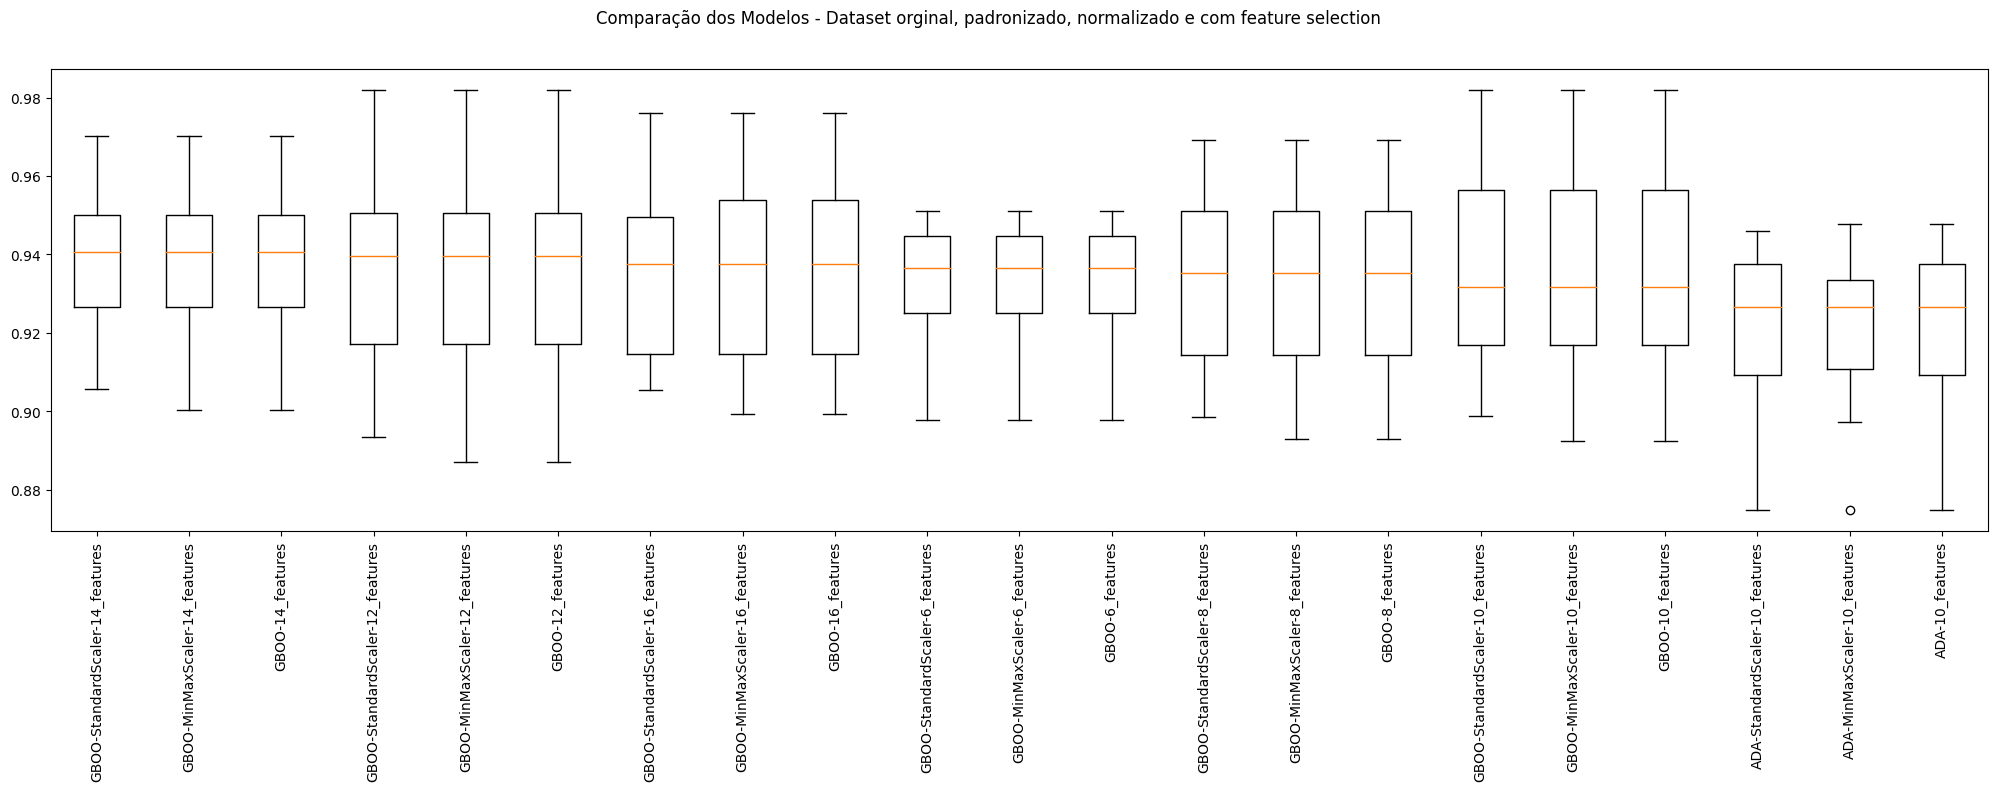

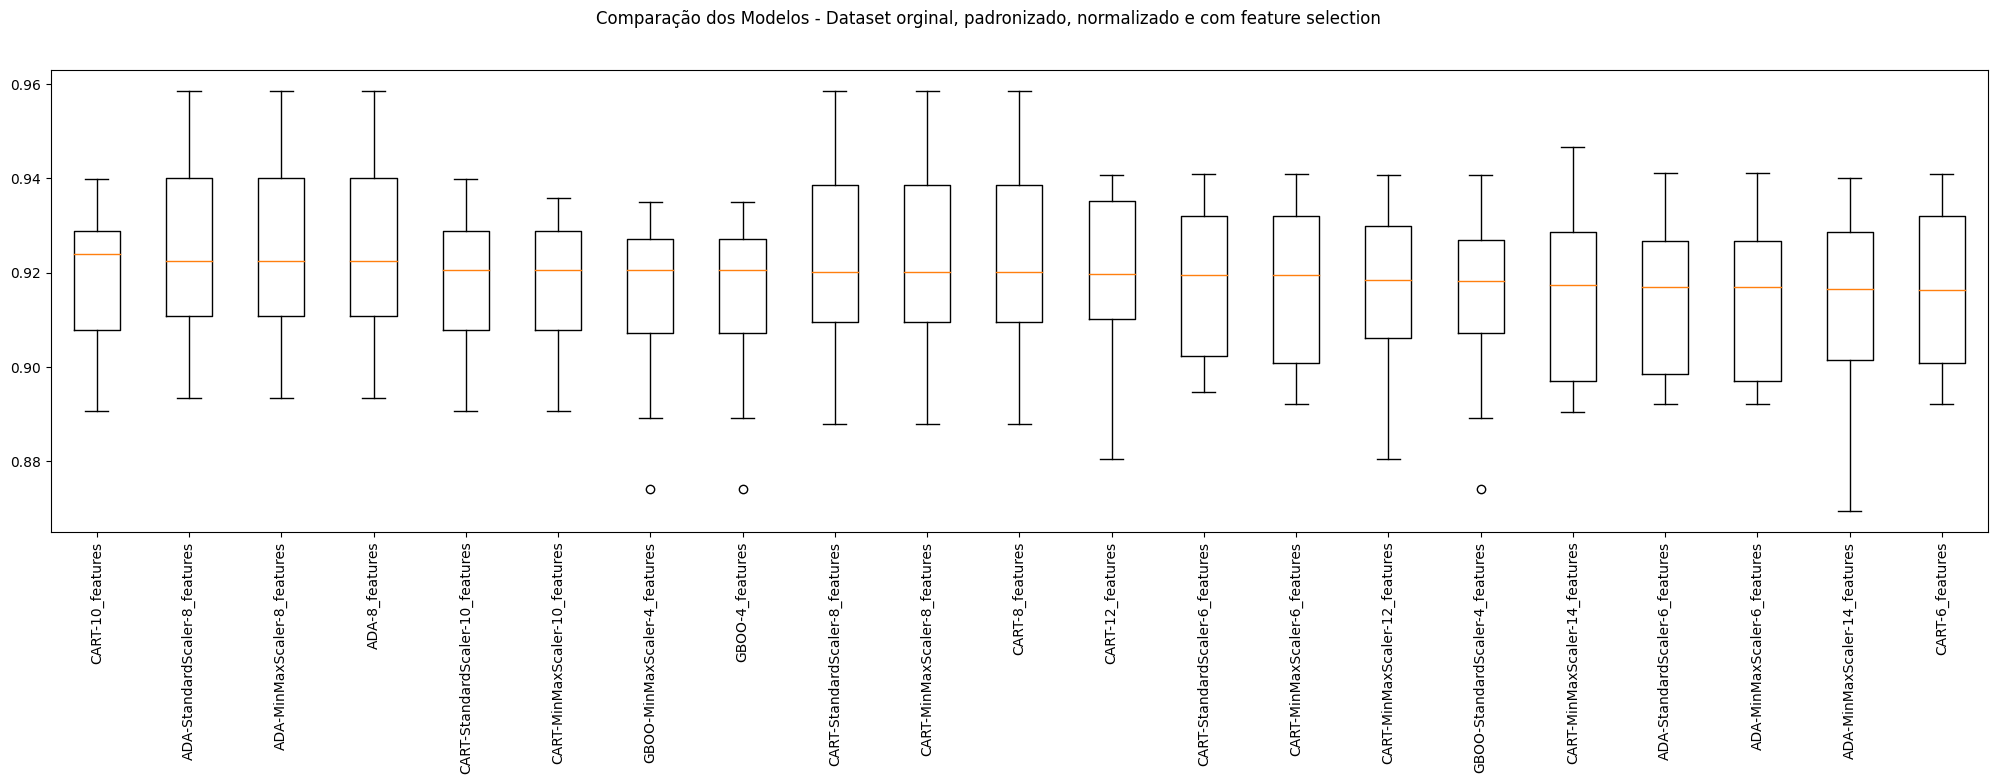

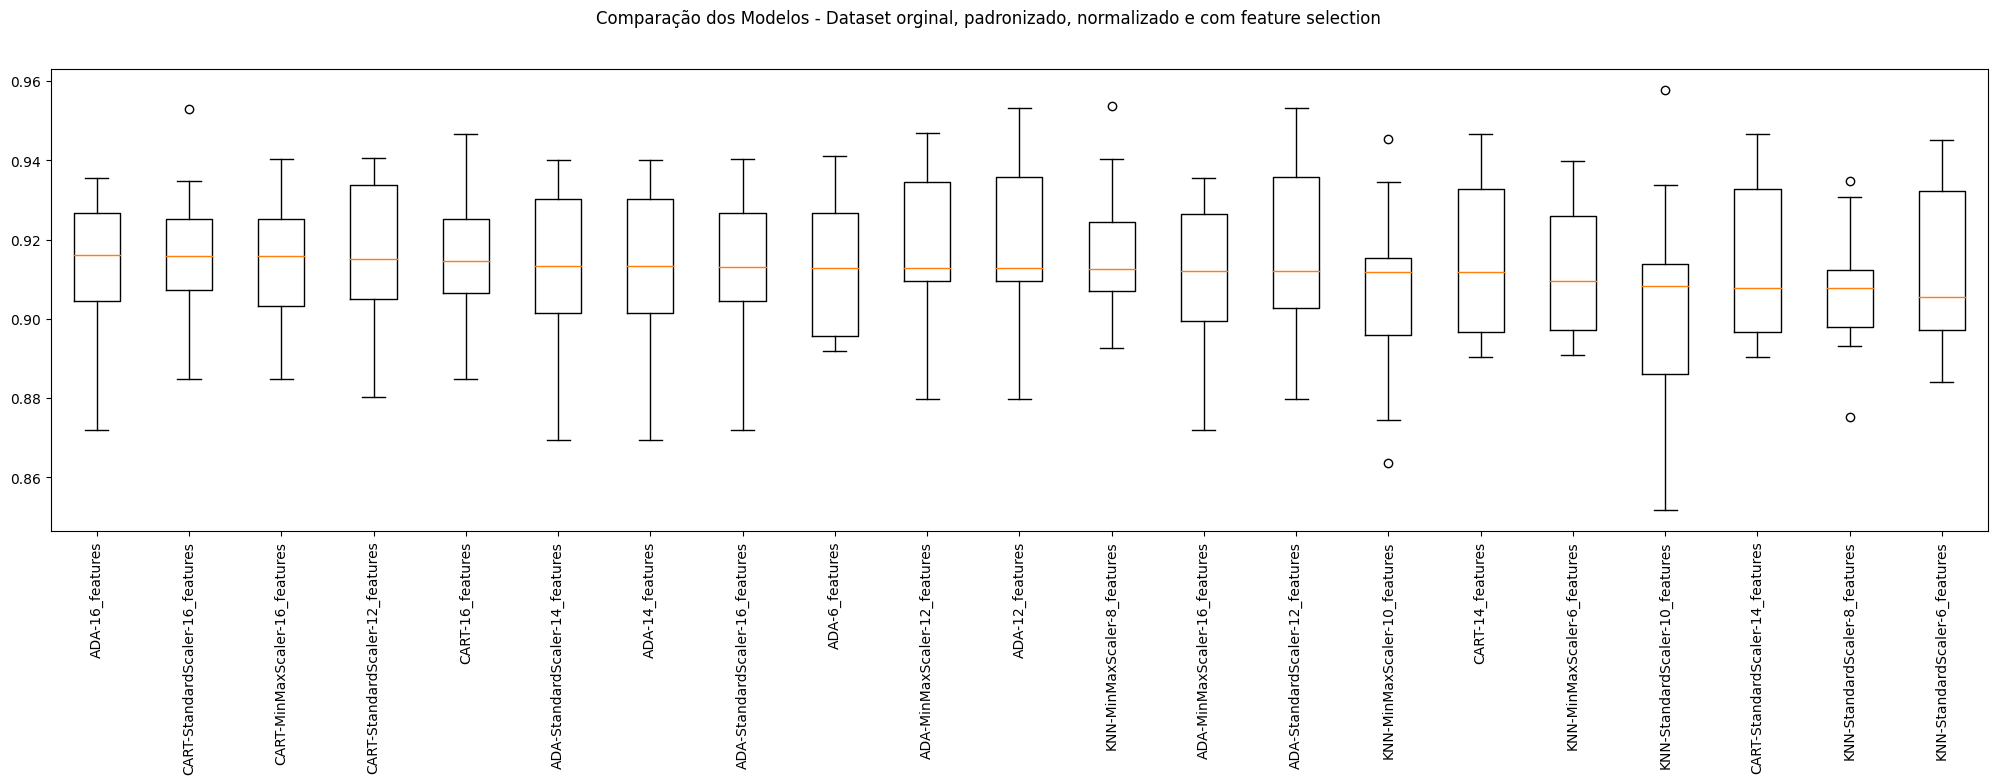

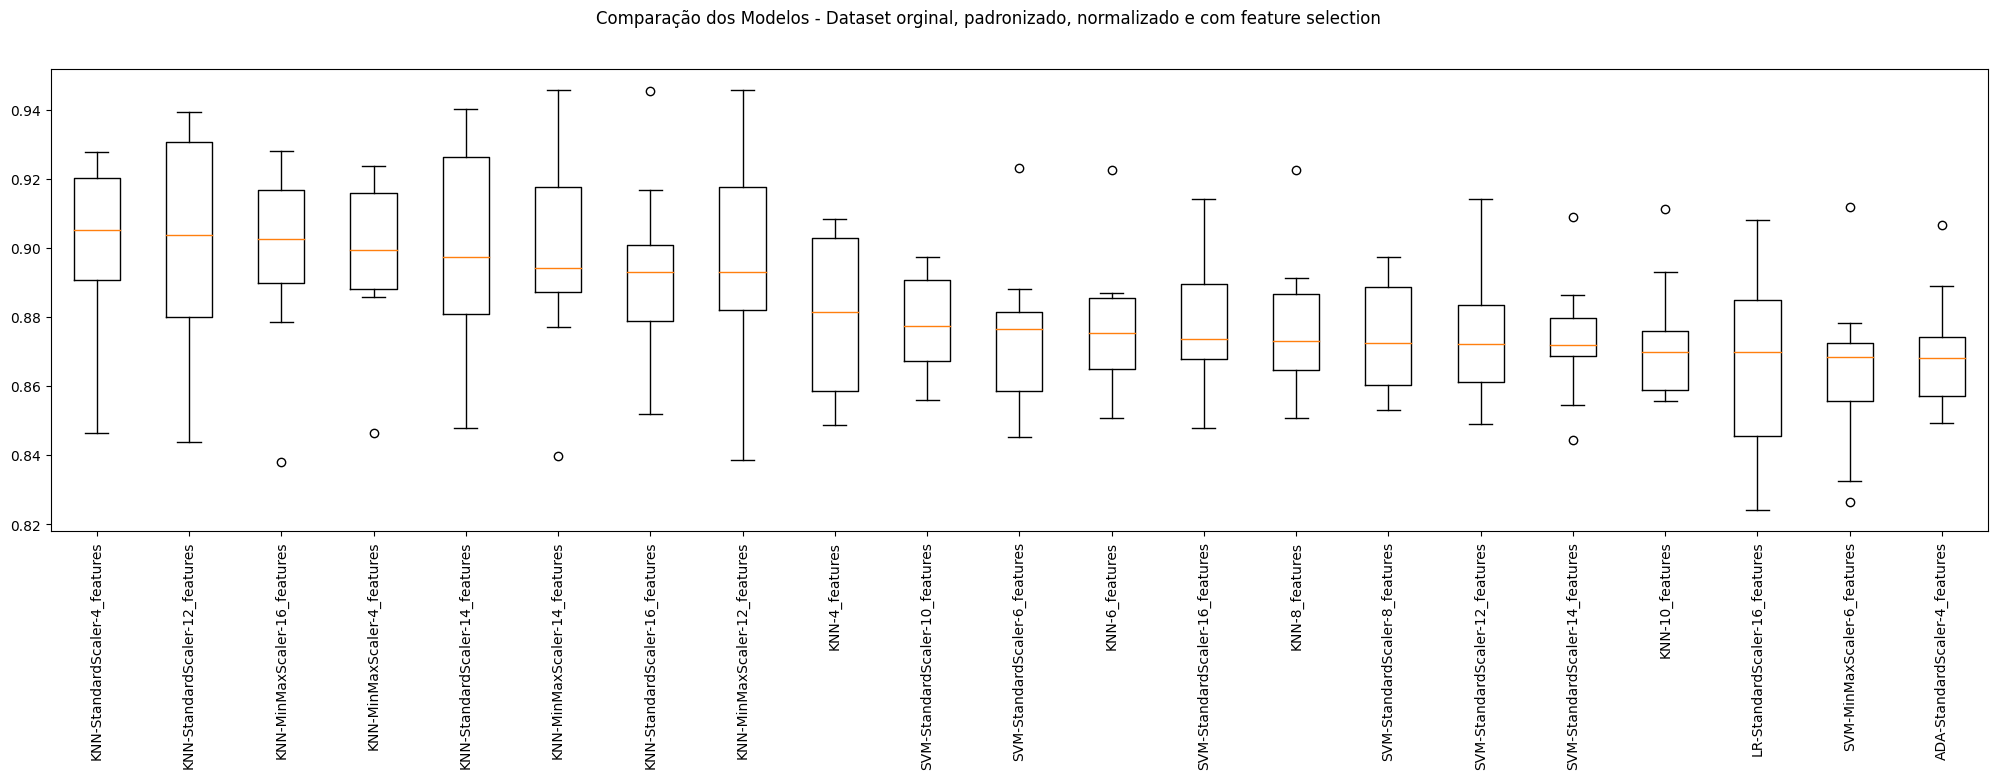

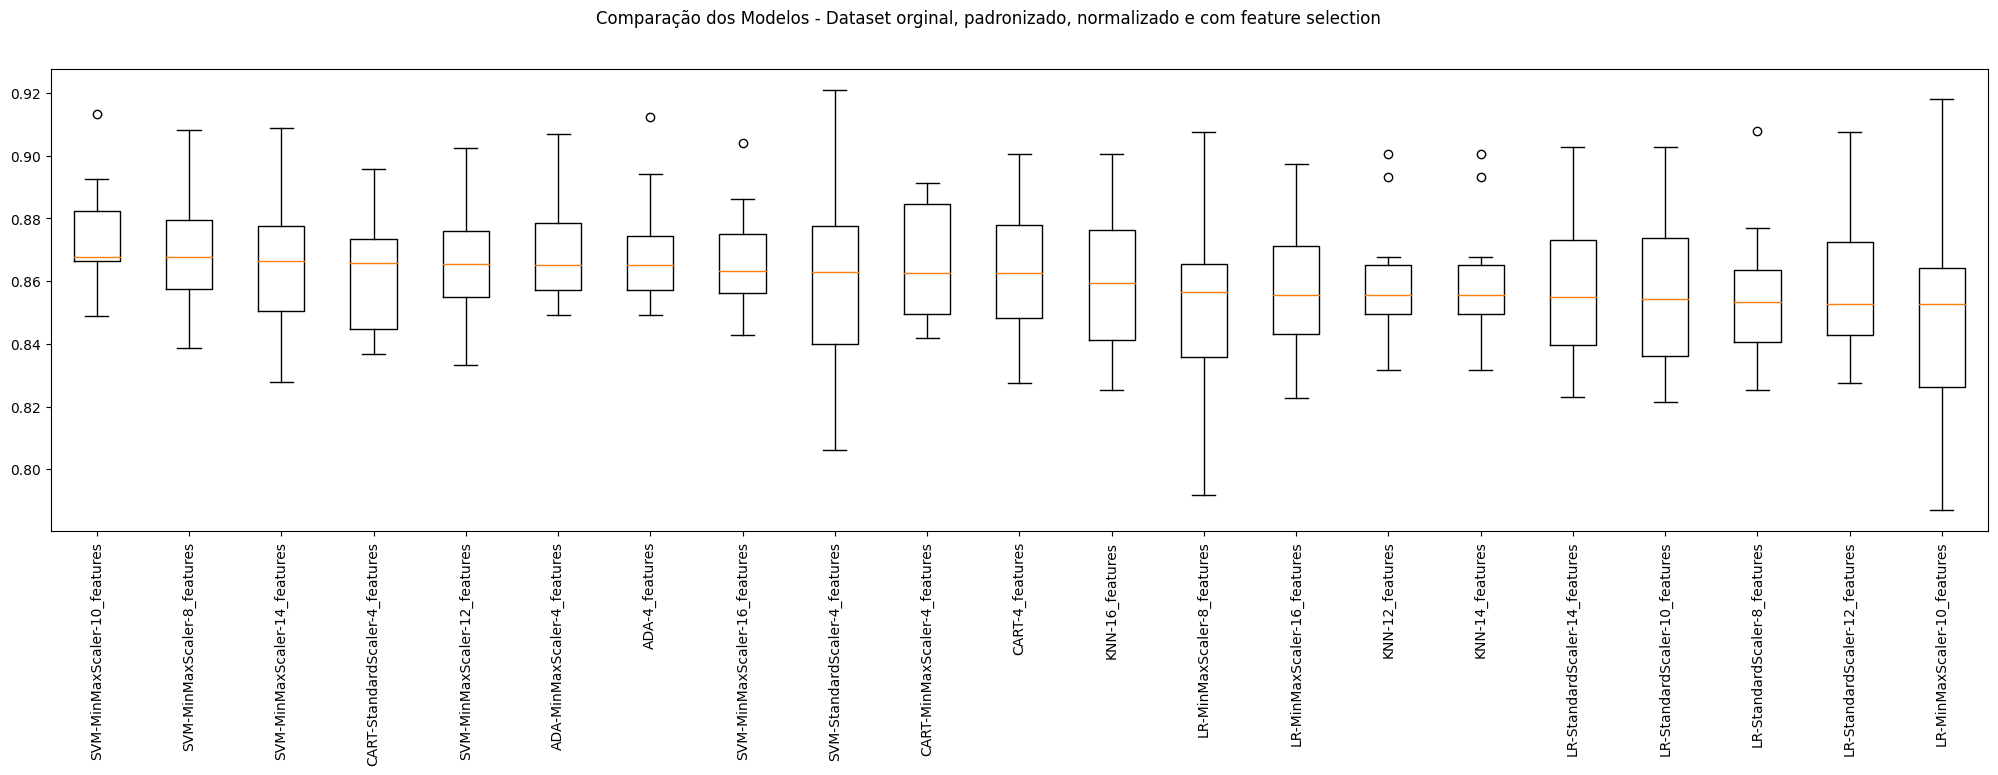

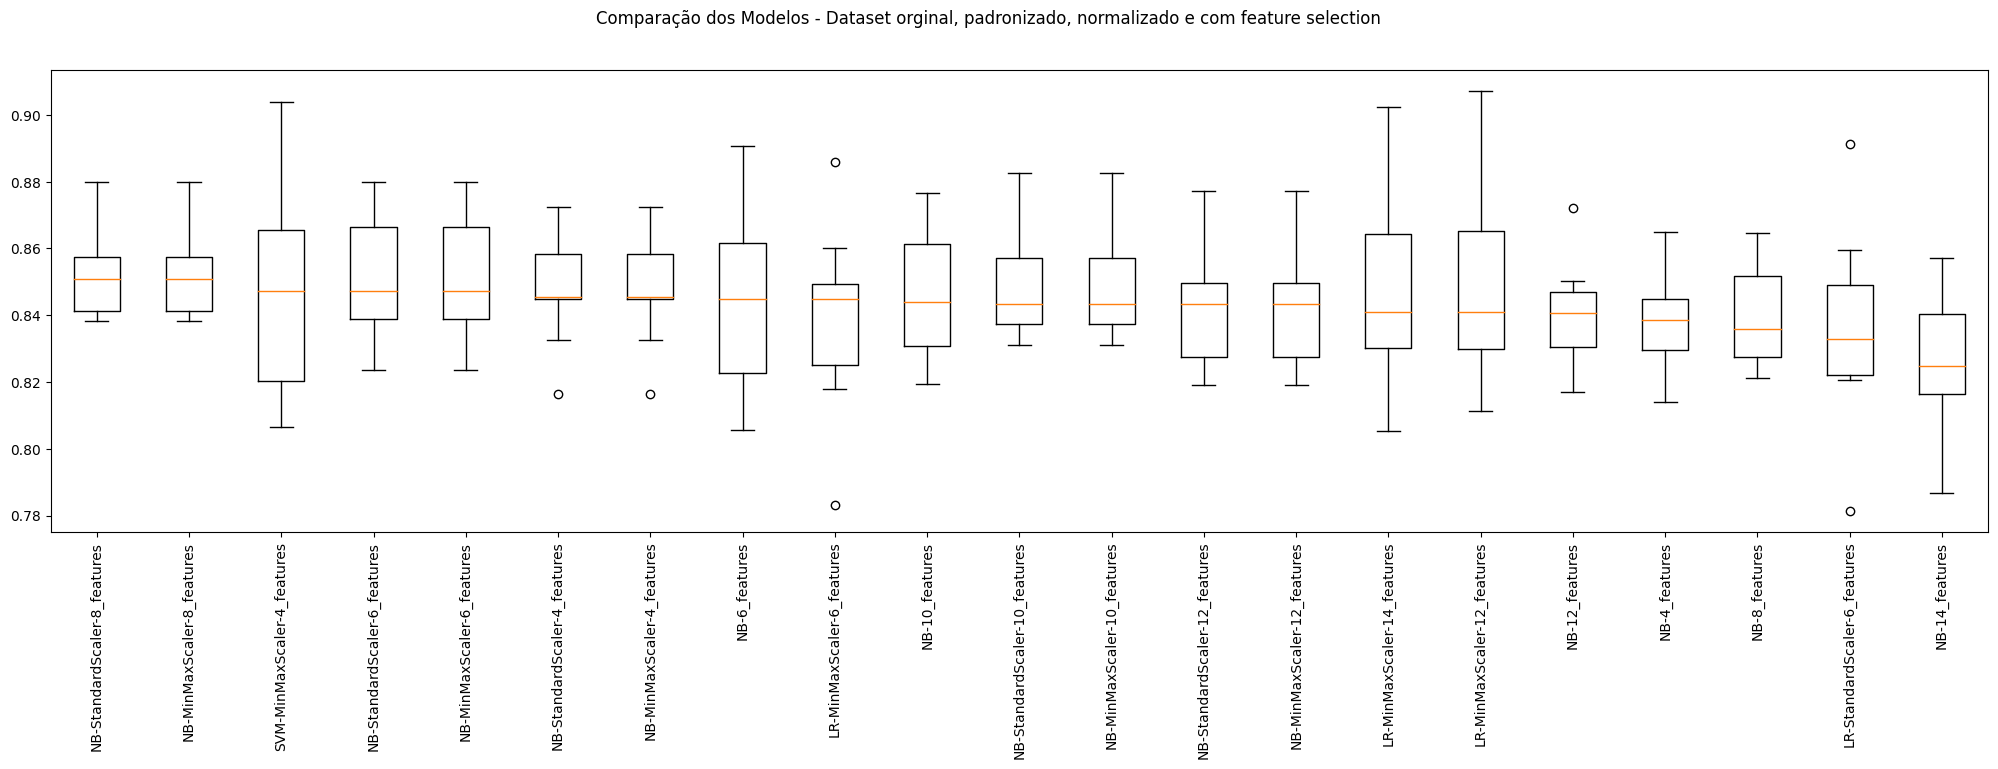

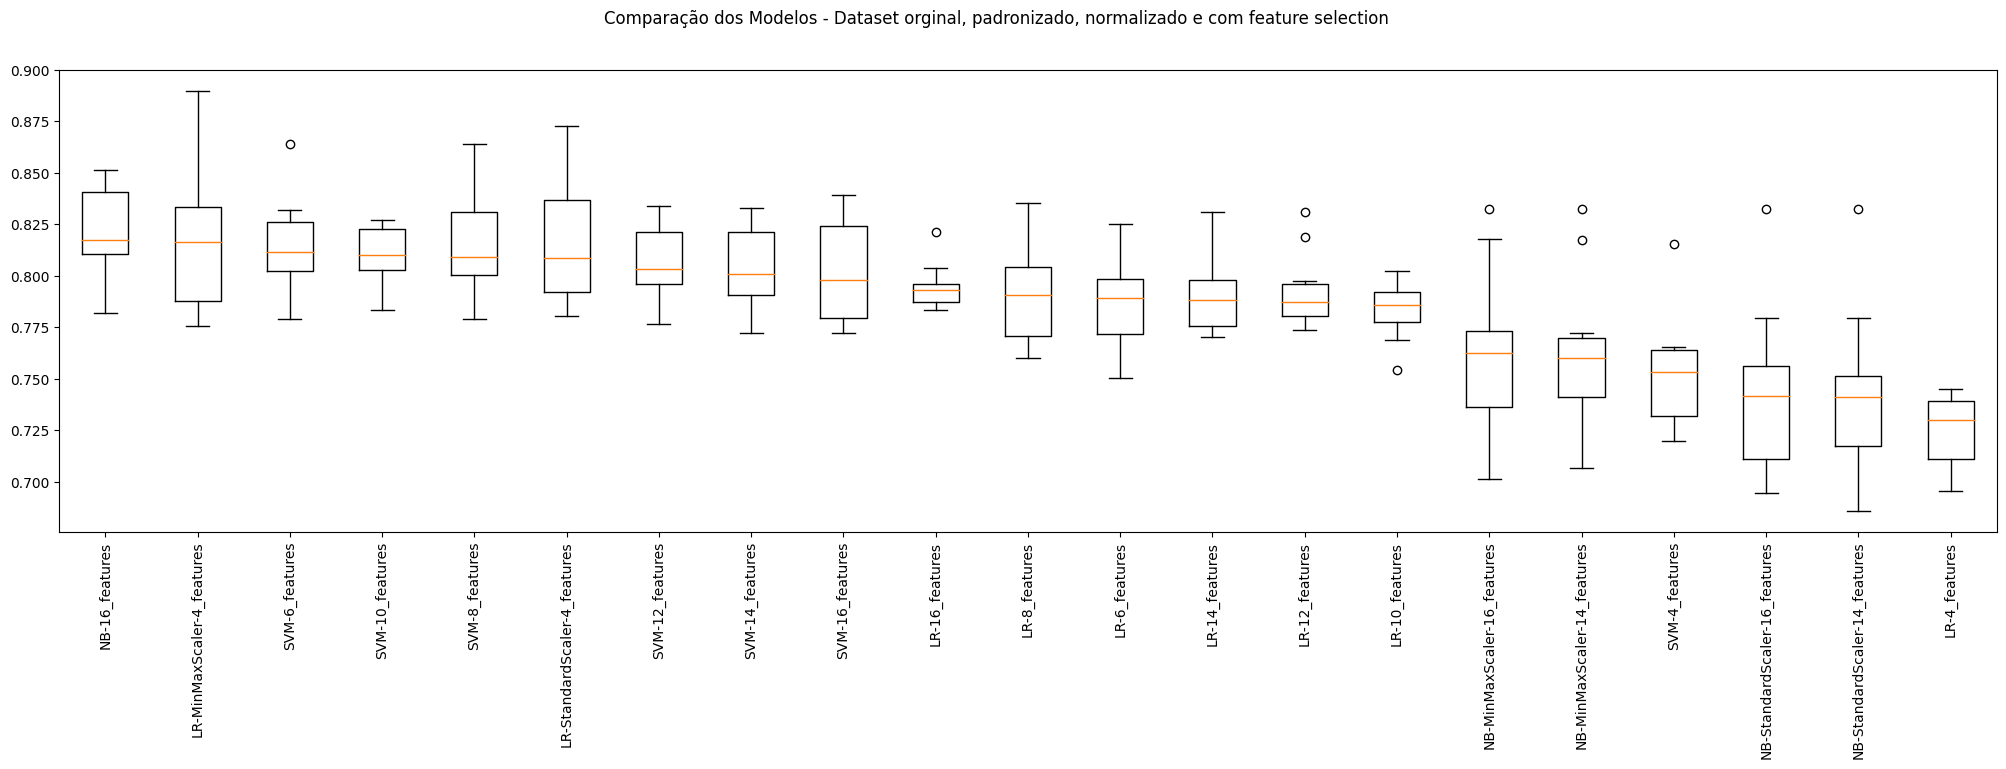

In [19]:
# Ordenando a lista name_results com base nos resultados
name_results_sorted = sorted(name_results, key=lambda x: np.median(x[1]), reverse=True)

# Imprimindo os resultados ordenados
for name, cv_results in name_results_sorted:
    msg = "%s: %.3f (%.3f)" % (name, np.median(cv_results), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

name_results_sorted_batches = []
# Plotando em imagens com 21 modelos cada
for i in range(0,7):
  name_results_sorted_batches.append(name_results_sorted[21*i:21*(i+1)])


for i in range(0,len(name_results_sorted_batches)):
  fig = plt.figure(figsize=(25,6))
  fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado, normalizado e com feature selection')
  ax = fig.add_subplot(111)

  # Preparando os dados para o boxplot
  sorted_results = [item[1] for item in name_results_sorted_batches[i]]
  sorted_names = [item[0] for item in name_results_sorted_batches[i]]

  # Plotando o boxplot
  plt.boxplot(sorted_results)
  ax.set_xticklabels(sorted_names, rotation=90)
  plt.show()




## Analisando os resultados da validação para diferentes modelos
Vamos concentrar na análise da primeira imagem, que contem os modelos mais bem avaliados (listados os 21 primeiros abaixo)

Modelo | F1-Score Mediano | Desvio Padrão
------- |---------|-------
GBOO-StandardScaler-14_features| 0.941 |0.020
GBOO-MinMaxScaler-14_features| 0.941 |0.021
GBOO-14_features| 0.941 |0.021
GBOO-StandardScaler-12_features| 0.940 |0.026
GBOO-MinMaxScaler-12_features| 0.940 |0.028
GBOO-12_features| 0.940 |0.028
GBOO-StandardScaler-16_features| 0.937 |0.023
GBOO-MinMaxScaler-16_features| 0.937 |0.024
GBOO-16_features| 0.937 |0.024
⭐ **GBOO-StandardScaler-6_features**| 0.937 |0.016
GBOO-MinMaxScaler-6_features| 0.937 |0.016
GBOO-6_features| 0.937 |0.016
GBOO-StandardScaler-8_features| 0.935 |0.024
GBOO-MinMaxScaler-8_features| 0.935 |0.025
GBOO-8_features| 0.935 |0.025
GBOO-StandardScaler-10_features| 0.932 |0.024
GBOO-MinMaxScaler-10_features| 0.932 |0.025
GBOO-10_features| 0.932 |0.025
ADA-StandardScaler-10_features| 0.927 |0.021
ADA-MinMaxScaler-10_features| 0.927 |0.021
ADA-10_features| 0.927 |0.022


![top_21_models](https://drive.google.com/uc?export=view&id=1UuNnH_YyZNTeNYEkM6XkIJ-sZi4OMsXJ)

Primeiramente, vemos que os top 21 modelos alcançaram todos resultados importantes, com score maior que 90%

Uma primeira análise mostra que o algoritmo GradientBoosting foi soberano face aos demais, aparecendo sempre nas primeiras posições, variando-se apenas o número de features consideradas e o tipo de scaling utilizado. Este fato reitera a potência do algoritmo GradientBoosting e dos métodos Ensemble em geral (dado que o AdaBoost completa a lista).

Poderiamos considerar o modelo GBOO-StandardScaler-14_features como opção e seguir com ele. Este foi o modelo que apresentou melhor resultado médio entre todos (0,941) e dispensa o uso de 2 features - utilizando 14.

Na sequência vemos modelos com 14, 16 ou 12 features, com resultados similares oscilando entre 0,937 a 0,941.

No entanto, o décimo modelo da lista (GBOO-StandardScaler-6_features) chama a atenção. Ele apresenta um score F1 mediano de 0,937 - virtualmente empatado com 2 modelos anteriores que utilizam as 16 features - estando próximo do melhor modelo que possui um score mediano de 0,941 mas que utiliza mais que o dobro de funcionalidades (6 vs. 14).

Além disso, o modelo com 6 features apresenta um desvio padrão menor (0,016 contra 0,020) o que mostra que há menos variabilidade na avaliação nos diferentes batches da validação.

É interessante escolher um modelo com menos atributos, por uma série de vantagens:
* Torna o modelo menos complexo, trazendo ganhos computacionais
* O modelo fica mais generalista, menos suscetível a overfitting nos dados de treinamento
* Em um problema do mundo real isso significa menos trabalho para o especialista, ou seja, ao invés de ter que coletar 16 atributos, 6 são suficientes

Deste modo, pelos benefícios supracitados, ficamos inclinados a escolher o modelo GBOO-StandardScaler-6_features. Antes disso, precisamos verificar se ocorreu overfitting nos dados.

Uma estratégia é plotarmos as curvas de aprendizado - o que faremos a seguir.



In [20]:
# Vamos plotar a learning curve para ver se houve over ou underfitting no treinamento do modelo
# Função para plotar a curva de aprendizado

def plot_learning_curve(model, X, y, scoring, cv, label_train='Treino', label_test='Teste'):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 5),n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(
        train_sizes,
        train_scores_mean,
        label=label_train,
        linestyle='--',
    )
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.plot(
        train_sizes,
        test_scores_mean,
        label=label_test,
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )

# Plotar a curva de aprendizado para cada modelo

top_10_names = [item[0] for item in name_results_sorted[0:10]]

selected_pipelines = [pipeline for pipeline in pipelines if pipeline[0] in top_10_names ]

selected_pipelines_sorted = sorted(selected_pipelines, key=lambda x: top_10_names.index(x[0]))



❗ Importante: a plotagem das curvas de aprendizado pode demorar alguns minutos. Código do bloco a seguir pode ser interrompido a qualquer momento e irá plotar as curvas que calculou até o momento da interrupção. Após este bloco há um print da curva de aprendizado do modelo GBOO-StandardScaler-6_features caso não queiram esperar a execução.

### Plotando curvas de aprendizagem ###
(Clique em parar para interromper a execução a qualquer momento e ver as curvas já geradas caso não queira ver todas)

Avaliando GBOO-StandardScaler-14_features, 1 de 10 modelos
Avaliando GBOO-MinMaxScaler-14_features, 2 de 10 modelos
Avaliando GBOO-14_features, 3 de 10 modelos
Avaliando GBOO-StandardScaler-12_features, 4 de 10 modelos
Avaliando GBOO-MinMaxScaler-12_features, 5 de 10 modelos
Avaliando GBOO-12_features, 6 de 10 modelos
Avaliando GBOO-StandardScaler-16_features, 7 de 10 modelos
Avaliando GBOO-MinMaxScaler-16_features, 8 de 10 modelos
Avaliando GBOO-16_features, 9 de 10 modelos
Avaliando GBOO-StandardScaler-6_features, 10 de 10 modelos


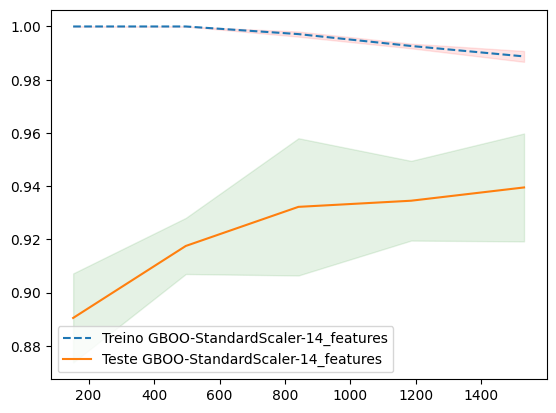

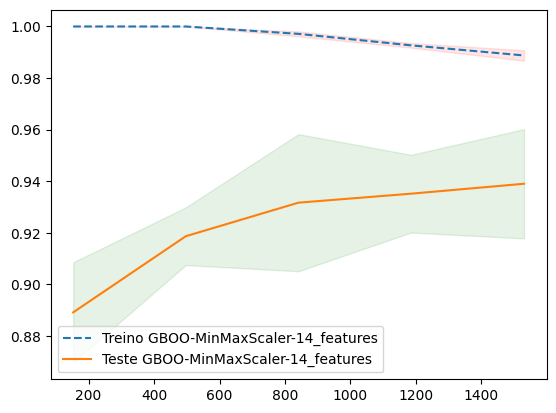

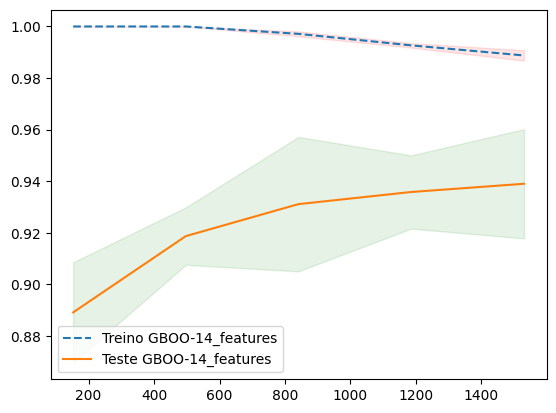

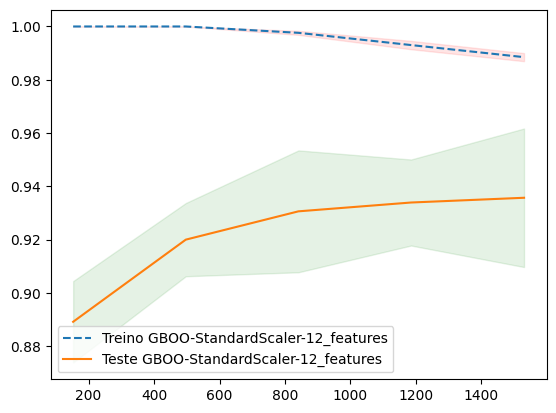

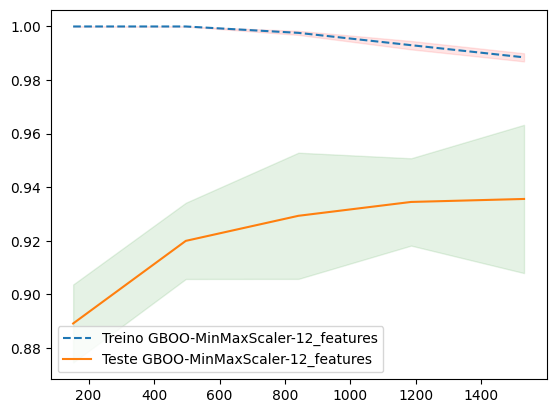

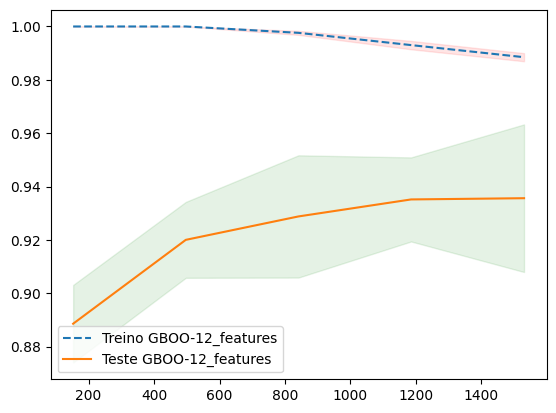

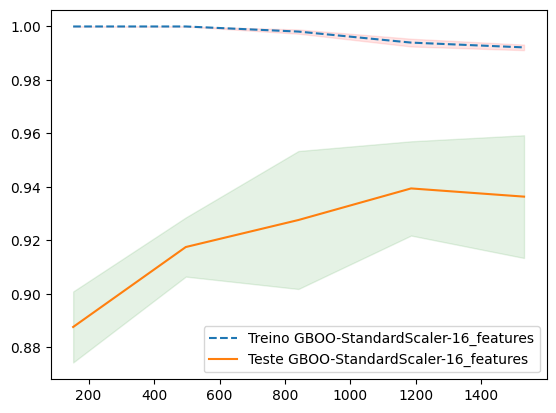

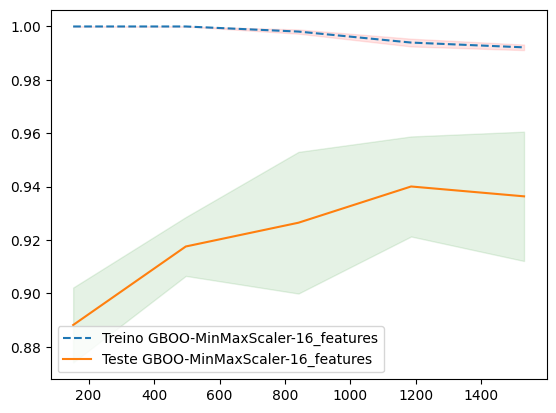

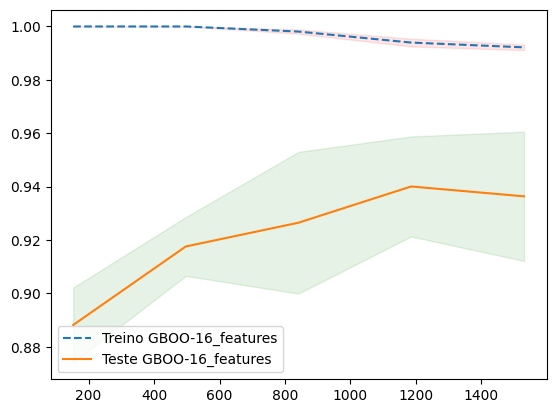

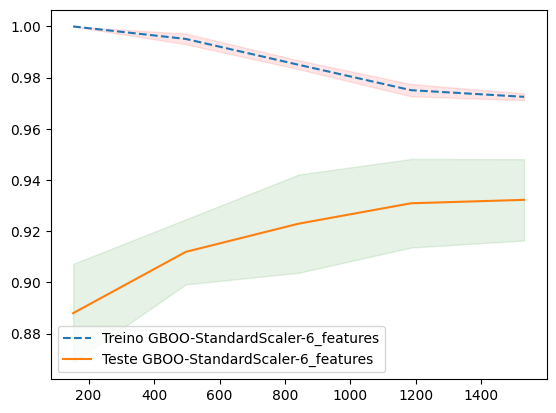

In [21]:
# Atenção, bloco de código demorado. Leva em torno de 5min mas pode ser interrompido no meio se desejar

print('### Plotando curvas de aprendizagem ###')
print('(Clique em parar para interromper a execução a qualquer momento e ver as curvas já geradas caso não queira ver todas)\n')

for i, (name, model) in enumerate(selected_pipelines_sorted):
  print(f'Avaliando {name}, {i+1} de {len(selected_pipelines_sorted)} modelos')
  plt.figure()
  plot_learning_curve(model, X_train, y_train, scoring=scoring, cv=kfold, label_train = 'Treino ' + name,label_test = 'Teste ' + name)
  plt.legend(loc="best")

Vamos analisar a curva de aprendizado do modelo GBOO-StandardScaler-6_features apresentada abaixo.

![learning_curve](https://drive.google.com/uc?export=view&id=1krmNW9Ow7Xd8ToL8JTZj5I7CC6Pxoj79)

Por meio dela, vemos o desempenho do modelo tanto na etapa de treino como na etapa de validação. Vemos que os resultados vão convergindo para um valor em torno de \~0,95. A aproximação das duas curvas em um patamar elevado (\~95% no caso) indica que não há overfitting nem underfitting, ou seja, o modelo no longo prazo está se aproximando de um score comum.

Teríamos overfitting se o desempenho no treino fosse muito superior ao de validação, indicando uma distância entre as curvas muito grande; e teríamos underfitting se o modelo não conseguisse obter um score relevante no treinamento nem no teste.

Após essa última análise, podemos dizer que vamos seguir com o modelo GBOO-StandardScaler-6_features, passando então para a otimização dos hiperparâmetros - que é a nossa próxima etapa.

## Otimização dos hiperparâmetros

Após decidirmos prosseguir com o modelo GBOO-StandardScaler-6_features, precisamos ver qual o melhor conjunto de hiperparâmetros a ser aplicados. Está etapa é um "fine-tunning" do modelo e pode ser bem demorada dependendo das combinações desejadas a se testar.

O algoritmo de ensemble GradientBoosting tem mais de 10 parâmetros que poderiam ser otimizados. Para as combinações não se tornarem proibitivas, decidiu-se avaliar as combinações do número de estimadores (lembrando que o GBOO é um algoritmo de ensemble que é composto de N estimadores) e também a taxa de aprendizado.

Variar o número de estimadores é mexer no núcleo de um algoritmo de ensembles. Um número maior de estimadores pode pegar nuances mais complexas nos dados mas também levar ao overfitting.

Já variar a taxa de aprendizado vai mexer na contribuição de cada estimador na correção dos estimadores anteriores. Um valor muito alto pode fazer com que o modelo oscile em torno da solução ótima e um valor muito baixo pode fazer o modelo demorar a convergir ou então convergir para uma solução sub-ótima.

Vamos variar os parâmetros nos seguintes ranges:
* Nr. de Estimadores: 100; 500 ou 1000
* Taxa de Aprendizado: 0,01 ; 0,1 ou 1

São 9 combinações de parâmetros, com cross-validation de 10 batches, resultando em 90 fits

In [22]:
# Variável criada para identificar se o bloco seguinte foi executado em sua totalidade
bloco_grid_search_executado = False

scaler = ('StandardScaler', StandardScaler())
feature_selection = ('6_features', SelectKBest(f_classif, k=6))
model = ('GBOO', GradientBoostingClassifier(random_state=seed))

selected_pipeline = [('GBOO-StandardScaler-6_features',Pipeline([scaler, feature_selection, model]))]

param_grid = {
    'GBOO__n_estimators':[100,500,1000],
    'GBOO__learning_rate':[0.01, 0.1, 1.0]
}

grid = GridSearchCV(estimator=selected_pipeline[0][1], param_grid=param_grid, scoring=scoring, cv=kfold, verbose=10,n_jobs=-1)

❗Importante, o bloco de código a seguir tem execução lenta. Caso não deseje executá-lo, pode passar para o bloco seguinte onde carregamos o modelo já com seus hiperparâmetros otimizados

In [23]:
# Atenção! Bloco de código com tempo de execução de 6min
# Tunning de hiperparametros do modelo selecionado

grid_fitted = grid.fit(X_train, y_train)
bloco_grid_search_executado = True

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [24]:
if bloco_grid_search_executado is False:
  url = 'https://github.com/hessrafael/mvp_rafael_hess_fetal_health_class/raw/main/saved_results/GridSearchResult.pkl'
  urllib.request.urlretrieve(url, 'GridSearchResult.pkl')
  load = joblib.load('GridSearchResult.pkl','r')
  grid_fitted = load

In [25]:
# imprime a melhor configuração
print("Modelo: %s - Melhor: %f usando %s" % (selected_pipeline[0][0], grid_fitted.best_score_, grid_fitted.best_params_))

Modelo: GBOO-StandardScaler-6_features - Melhor: 0.934111 usando {'GBOO__learning_rate': 0.1, 'GBOO__n_estimators': 500}


Vemos que a melhor combinação do modelo é com os seguintes parâmetros:

Modelo: GBOO-StandardScaler-6_features - Melhor: 0.934111 usando 'GBOO__learning_rate': 0.1, 'GBOO__n_estimators': 500

Assim, temos o nosso modelo definido e podemos para o fit em todo o conjunto treino e sua avaliação no conjunto teste

# Avaliação dos Resultados: Finalização do Modelo e avaliação nos dados de teste

Vamos instanciar o modelo Modelo: GBOO-StandardScaler-6_features com a taxa de aprendizado de 0,1 e 500 estimadores. Após daremos fit em todo o conjunto treino e avalia-lo no conjunto teste.

In [26]:
# Finalizando o modelo após tunning de hiperparamtros
scaler = ('StandardScaler', StandardScaler())
feature_selection = ('6_features', SelectKBest(f_classif, k=6))
model = ('GBOO', GradientBoostingClassifier(n_estimators=500,learning_rate=0.1, random_state=seed))

selected_pipeline = [('GBOO-StandardScaler-6_features',Pipeline([scaler, feature_selection, model]))]

selected_pipeline[0][1].fit(X_train,y_train)

predictions = selected_pipeline[0][1].predict(X_test)

print(metrics.f1_score(y_test, predictions, average='weighted'))




0.9217421649717401


Vemos que o modelo chegou num score F1_weighted (nossa métrica de avaliação) de 0,922 - desempenho um pouco inferior aos 0,934 do tunning de hiperparâmetros, o que é normal em dados nunca antes vistos como no caso do conjunto teste. Como os valores de F1 para o conjunto teste e no GridSearch são próximos, podemos ver que o modelo generalizou bem para dados não vistos, mais uma vez indicando que não houve under ou overfitting

Vamos dar uma olhada em quais atributos o modelo manteve?

In [27]:
# Avaliando as features mantidas
selected_features_indices = selected_pipeline[0][1].named_steps['6_features'].get_feature_names_out(dataset.columns[0:-1])

print(selected_features_indices)

['baseline value' 'accelerations' 'prolongued_decelerations'
 'abnormal_short_term_variability'
 'percentage_of_time_with_abnormal_long_term_variability'
 'histogram_variance']


Ao executar o código acima, vemos que o modelo manteve os parâmetros:
* baseline_value
* accelerations
* prolongued_decelerations
* abnormal_short_term_variability
* percentage_of_time_with_abnormal_long_term_variability
* histogram_variance

Em uma primeira vista faz sentido os parâmetros mantidos pelo modelo. O exame de CTG, relembrando, monitora por um período de tempo os batimentos cardíacos fetais. A ideia é monitorar o batimento enquanto o feto é submetido a estimulos, devendo ser observada um certo tipo de variabilidade (oscilações) no valor dos batimentos.

Assim, parece fazer sentido o modelo utilizar o valor da linha de base dos batimentos, as acelerações dos batimentos bem como as desacelerações. A variância do histograma também é um indicativo de como oscilam os batimentos. Além disso, as duas features que falam de variabilidade anormais podem levar a resposta do modelo para algo saudável ou patológico dependendo do seu valor.

A seleção dos atributos mantidos no modelo utiliza o método SelectKBest combinado com a função f_classif que, para cada atributo, faz um teste de análise de variância (ANOVA) onde avalia individualmente o impacto de cada atributo na variável target, com o algoritmo mantendo os parãmetros que melhor contribuem (impactam) a variável target.

Bom, dado que o problema é uma classificação multiclasse, o valor de F1-Score não traz todas as nuances do problema. Para isso, vamos dar uma olhada na matriz de confusão?

Esta matriz vai nos mostrar como o modelo se comporta para cada um dos 3 valores possíveis para o target.

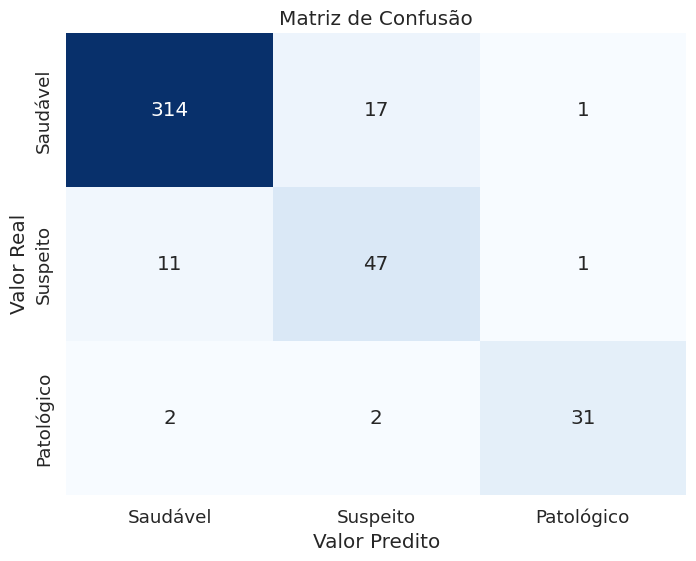

In [28]:
# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions)

# Plotando a matriz de confusão
classes = ['Saudável', 'Suspeito', 'Patológico']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta o tamanho da fonte
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues", cbar=False,vmin=1, xticklabels=classes, yticklabels=classes)
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

Analisando a matriz de confusão exibida abaixo conseguimos ver o desbalanceamento entre as classes.

Para a classe saudável, vemos que 314 instâncias são identificadas corretamente, 17 são interpretadas como suspeitas e 1 como patológicas

Para a classe suspeito, vemos que 47 são identificadas corretamente, 11 como saudável e apenas 1 como patológica

Para a classe patológico, vemos que 31 são identificadas corretamente, 2 como suspeita e 2 como saudáveis

Podemos perceber que o modelo "se atrapalha" mais na distinção entre o que é saudável e o que é suspeito. Essa confusão é relativamente normal, pois vale saber que não há um limiar perfeito entre um CTG saudável e um suspeito, com especialistas do domínio podendo divergir em suas análises. Além disso a própria definição de suspeito indica que não há uma conclusão definitva, com a análise devendo ser repetida algumas vezes para então poder ver se o fato é de fato saudável ou então patológico.

De todo modo, mesmo com esses erros de classificação, veremos na seção seguinte que o modelo equilibra bem a precisão e o recall, resultado do seu score F1-weighted elevado.

![matrix_confusao](https://drive.google.com/uc?export=view&id=1YdF_mk_IZPWBQyAIS74rfUhvNoID8JDE)



In [29]:
# Calculando o relatório de classificação
class_report = classification_report(y_test, predictions, target_names=['Saudável', 'Suspeito', 'Patológico'])

print("Relatório de Classificação:")
print(class_report)

Relatório de Classificação:
              precision    recall  f1-score   support

    Saudável       0.96      0.95      0.95       332
    Suspeito       0.71      0.80      0.75        59
  Patológico       0.94      0.89      0.91        35

    accuracy                           0.92       426
   macro avg       0.87      0.88      0.87       426
weighted avg       0.92      0.92      0.92       426



Analisando o relatório de classificação (apresentado novamente abaixo) vemos que o sistema apresenta uma precisão muito alta para a classe saudável, bem como um elevado recall. Isso significa que o modelo consegue cobrir a maioria dos casos presentes (significado implicito do recall) e com uma elevada precisão. Esta é a classe mais presente no conjunto teste, com 332 instâncias.

Para a classe patológica, vemos que o sistema apresenta uma alta precisão de 94% e consegue cobrir 89% dos casos (recall). A classe patológico é muito importante pois é uma questão literalmente de vida ou morte do feto que está sendo avaliado. Pela matriz de confusão vemos que não há, a princípio, um viés do modelo quando erra a classificação de patológico - seriam necessários mais dados para ver se quando o modelo erra a classe patológica ele direciona mais para suspeito ou mais para saudável.

Por fim, a classe suspeita é a que apresenta menor precisão e menor recall (71% e 80%, respectivamente). Isso é resultado da "zona cinzenta" que o próprio conceito de suspeito se encontra. Idealmente, no mundo real, um resultado identificado como suspeito deve ter o exame repetido posteriormente para uma nova análise.

Relatório de Classificação:

Classe  | Precisão | Recall | F1-Score | Suporte
--------|----------|--------|----------|---------
Saudável|0,96|0,95|0,95|332
Suspeito|0,71|0,80|0,75|59
Patológico|0,94|0,89|0,91|35
---

Métrica  | Precisão | Recall | F1-Score | Suporte
--------|----------|--------|----------|---------
Accuracy|||0,92|426
Macro Avg|0,87|0,88|0,87|426
Macro Avg|0,92|0,92|0,92|426



Vamos dar uma olhada na sua Curva ROC para ver como ele está performando em relação a um modelo aleatório?

Score Médio da Área sob a Curva (AUC):
0.99


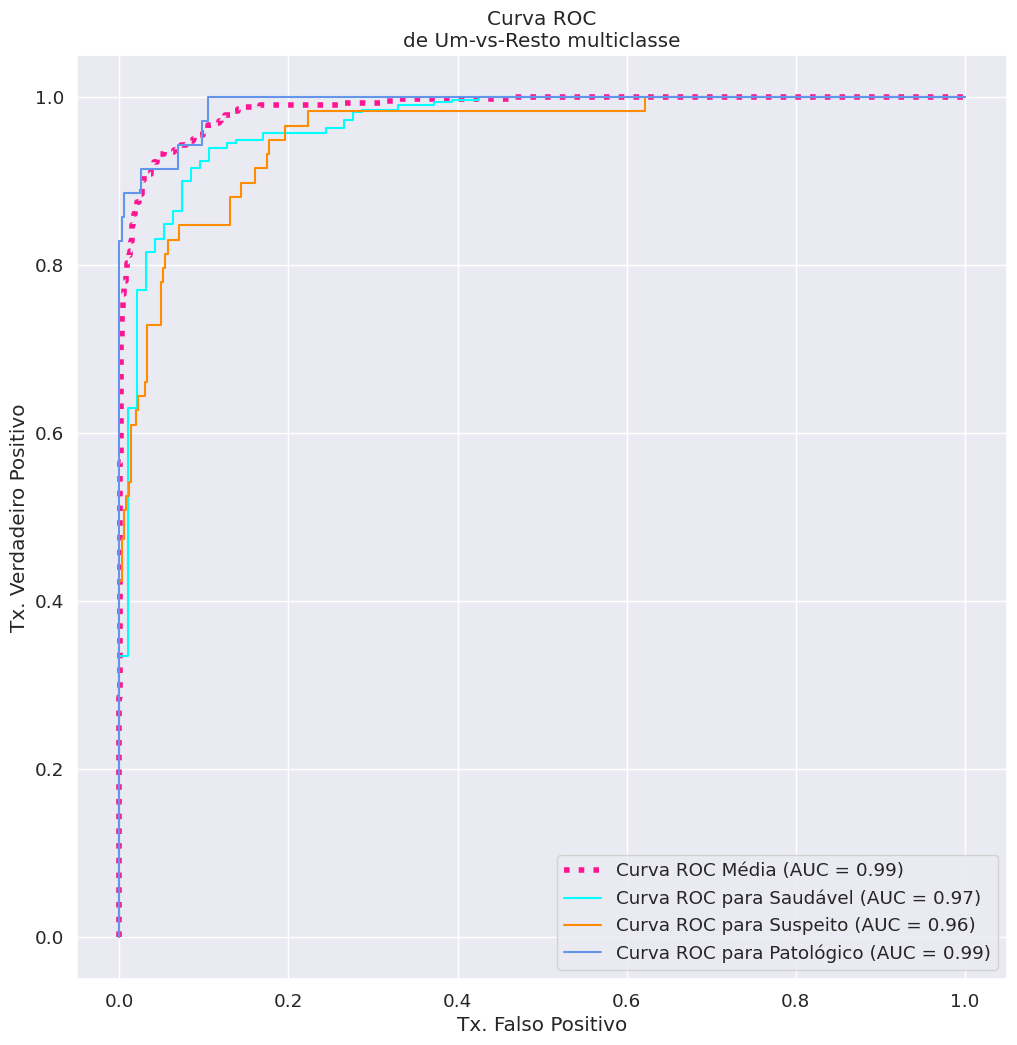

In [30]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)


y_score = selected_pipeline[0][1].predict_proba(X_test)


classes = ['Saudável','Suspeito','Patológico']

# Variáveis para salvar a taxa de falso positivo, taxa de verdadeiro positivo e área sob a curva
fpr, tpr, roc_auc = dict(), dict(), dict()

# Calcula as variaveis acima
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Score Médio da Área sob a Curva (AUC):\n{roc_auc['micro']:.2f}")

fig, ax = plt.subplots(figsize=(12, 12))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"Curva ROC Média (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

colors = ["aqua", "darkorange", "cornflowerblue"]

for class_id, color in zip(range(len(classes)), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"Curva ROC para {classes[class_id]}",
        color=color,
        ax=ax
    )

_ = ax.set(
    xlabel="Tx. Falso Positivo",
    ylabel="Tx. Verdadeiro Positivo",
    title="Curva ROC\nde Um-vs-Resto multiclasse",
)

As Curvas ROC mostradas na figura abaixo servem como um meio de ver o quão bom um modelo é em relação a um simples "chute".

Nela vemos a taxa de verdadeiros positivos vs a taxa de falsos positivos


A regra geral é que um modelo que faça um simples chute seria uma reta indo da origem até o ponto (1,1) dado que em um chute teoricamente teríamos 50% de acertar (50% de ser um verdadeiro positivo ou um falso positivo). Um sistema perfeito seria uma linha vertical na origem, indicando que todos os palpites seriam 100% verdadeiros positivos e 0% falsos positivos.

Deste modo, a regra geral é que quanto mais superior à esquerda melhor o nosso modelo, com isso sendo refletido na área sob a curva (quanto maior, melhor).

A curva ROC foi criada para problemas binários, mas para problemas multiclasse podemos generalizar plotando uma classe vs todas as outras.

Vemos que na média, representado pela linha pontilhada, nosso modelo se sai muito bem, com uma área sob a curva de 0,99. Além disso, os próprios resultados individuais são muito satisfatórios ficando entre 0,96 e 0,99 - bem à esquerda do gráfico. Isso corrobora a qualidade do nosso modelo mostrando que ele é bem melhor que um simples chute.

![curva_roc](https://drive.google.com/uc?export=view&id=1bTKZ_B7ZilIbWsyh8_TvQfwU-G5SPahg)


Podemos também comparar o nosso modelo escolhido (GBOO-StandardScaler-6_features) com o modelo que havia performardo melhor na avaliação no conjunto treino, mas que utilizava mais que o dobro dos atributos (GBOO-StandardScaler-14_features) para ver como seria a sua performance no conjunto teste.

Para isso, vamos instancia-lo com os mesmos hiperparâmetros que tunnamos para o primeiro modelo (dado que ambos são do tipo GradientBoost com Padronização) e avaliar sua performance


In [31]:
# Instanciando modelo com 14 features
feature_selection_14_features = ('14_features', SelectKBest(f_classif, k=14))

# Podemos reaproveitar a instancia de scaler e model anteriores, apenas definindo uma nova instancia de feature selection

selected_pipeline_14_features = [('GBOO-StandardScaler-14_features',Pipeline([scaler, feature_selection_14_features, model]))]

selected_pipeline_14_features[0][1].fit(X_train,y_train)

predictions = selected_pipeline_14_features[0][1].predict(X_test)

print("Performance no teste do modelo: " + selected_pipeline_14_features[0][0])
print(metrics.f1_score(y_test, predictions, average='weighted'))

Performance no teste do modelo: GBOO-StandardScaler-14_features
0.9259424823041952


Vemos que sua perfomance no conjunto teste foi de 0,926 vs 0,923 do modelo escolhido inicialmente.

Em uma primeira vista, podemos concluir que a adição de mais que o dobro de atributos do modelo original não teve efeitos significativos, com a métrica F1 aumentando apenas na terceira casa decimal

Vamos ver com mais detalhes na matriz de confusão e no relatório de classificação?

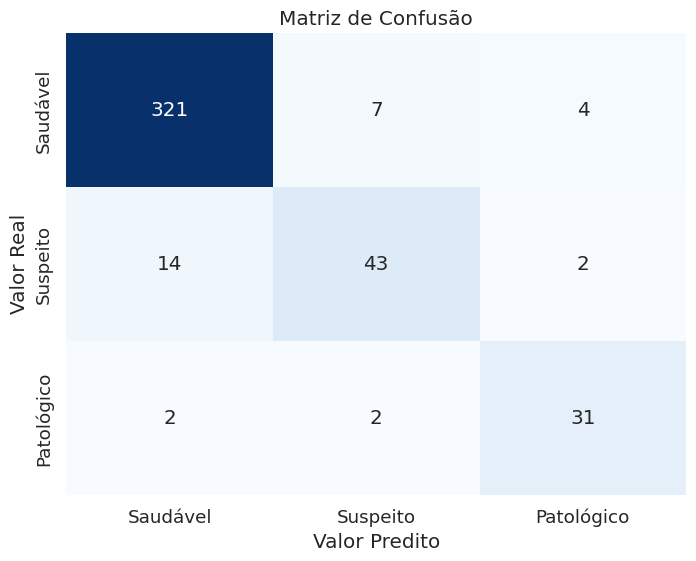

Relatório de Classificação:
              precision    recall  f1-score   support

    Saudável       0.95      0.97      0.96       332
    Suspeito       0.83      0.73      0.77        59
  Patológico       0.84      0.89      0.86        35

    accuracy                           0.93       426
   macro avg       0.87      0.86      0.87       426
weighted avg       0.93      0.93      0.93       426



In [32]:
# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions)

# Plotando a matriz de confusão
classes = ['Saudável', 'Suspeito', 'Patológico']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta o tamanho da fonte
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues", cbar=False,vmin=1, xticklabels=classes, yticklabels=classes)
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

# Calculando o relatório de classificação
class_report = classification_report(y_test, predictions, target_names=['Saudável', 'Suspeito', 'Patológico'])

print("Relatório de Classificação:")
print(class_report)

Pela Matriz de Confusão mostrada abaixo e pelo relatório de classificação vemos que apesar de o modelo ter uma performance geral um pouco melhor que o modelo escolhido originalmente, vemos que a melhora deu-se principalmente no recall da classe saudável e na precisão da classe suspeita, mas com um prejuízo na precisão da classe patológica. Isto é um problema no nosso caso, dado que a precisão para casos patológicos é uma questão que pode ser de vida ou morte para o feto. Pela matriz de confusão, comparando-a com a do modelo anterior, pode-se concluir que a melhora no F1 geral deu-se principalmente pela diminuição de casos suspeitos que eram tratados como saudáveis.

Dado que o modelo tornou-se mais complexo (mais que o dobro de atributos), teve apenas um ganho leve de performance e esse ganho foi na classe suspeita com uma perda na precisão dos patológicos, é recomendável seguir com o modelo original de apenas 6 features


![conf_mat_14](https://drive.google.com/uc?export=view&id=1XMhPgsiN0hvZAX5SlmLX-6IIIsAWZN68)


Classe  | Precisão | Recall | F1-Score | Suporte
--------|----------|--------|----------|---------
Saudável|0,95|0,97|0,96|332
Suspeito|0,83|0,73|0,77|59
Patológico|0,84|0,89|0,86|35
---

Métrica  | Precisão | Recall | F1-Score | Suporte
--------|----------|--------|----------|---------
Accuracy|||0,93|426
Macro Avg|0,87|0,86|0,87|426
Macro Avg|0,93|0,93|0,93|426

A título de curiosidade, podemos ver as 2 features que foram removidas

In [33]:
selected_features_indices_14 = selected_pipeline_14_features[0][1].named_steps['14_features'].get_feature_names_out(dataset.columns[0:-1])
features_iniciais = dataset.columns[0:-1]

features_removidas = features_iniciais.drop(selected_features_indices_14,errors='ignore')


print(features_removidas)

Index(['histogram_max', 'histogram_number_of_zeroes'], dtype='object')


# Discussão Final

Vemos que o modelo construído com 6 atributos consegue, com bastante sucesso, identificar a saúde fetal. Por ser um dataset altamente desbalanceado e com classificações subjetivas que dependem da opinião de um especialista a criação de um modelo de qualidade fica mais desafiadora.

O interessante é que o modelo criado conseguiu essa boa performance (0,92 no conjunto teste) utilizando apenas 6 atributos dos 21 originais. O que mostra que um tratamento prévio dos dados pode simplificar o modelo, com um resultado computacionalmente mais eficiente e também que necessite menos coleta de dados - que é um grande desafio, principalmente no setor de saúde.

Em geral, os resultados foram de muita qualidade, com a classe Suspeito apresentando os piores resultados - o que já é esperado conforme comentamos anteriormente nesse notebook dado a característica de ser uma "zona cinzenta" e que normalmente necessita de uma repetição posterior do exame até que se identifique o feto como saudável ou patológico.

Como formas de melhorar a análise poderíamos tentar utilizar outras abordagens, como Deep Learning (Redes Neurais) ou então buscar melhorar o dataset, refinando a análise dos especialistas de domínio ou então adicionando mais atributos como por exemplo a idade da gestante, a semana da gravidez, se está em jejum ou não ou condições da saúde materna (se está com febre, taquicárdica, entre outros).

Como continuidade do trabalho, seria interessante realizar a "tropicalização" do modelo. Isto é, buscar construir o mesmo dataset com dados da população brasileira. Vale ressaltar que o SUS é um sistema essencial para a população brasileira, atendendo a todos gratuitamente. Muitas vezes escutamos que faltam verbas para a saúde no Brasil, logo a utilização de um modelo de IA que ajudasse os médicos nas análises de CTG poderia contribuir na eficiência e economia para o sistema como um todo.